In [2]:
import scipy
from scipy import stats
import h5py
import statistics
import math
import pickle
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


In [3]:
# first we open data files
infile = open ("higgs_100000_pt_1000_1200.pkl",'rb')
higgs = pickle.load(infile)

infile2 = open ("qcd_100000_pt_1000_1200.pkl",'rb')
qcd = pickle.load(infile2)

# Lab 7 Problem 1

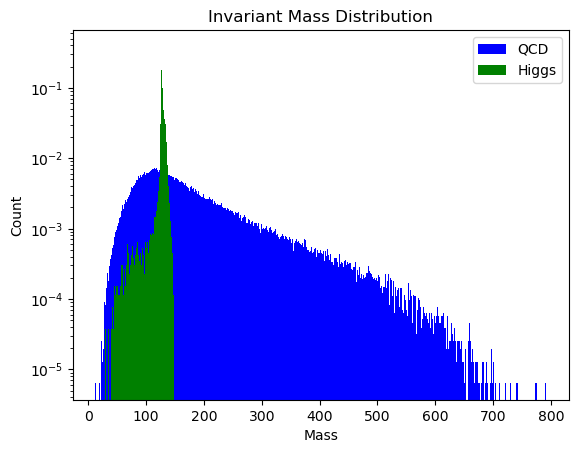

Mass of the Higgs Boson:  125
Mean: 177.27313143544927
Expected Significance:  2.1367130793052645e-05  sigma
NHiggs:  50.0
(√NQCD):  44.721359549995796
ratio:  1.118033988749895


In [4]:
bins = 500

plt.figure()
plt.hist([qcd['mass'][:]], bins, stacked = True, density = True, label = 'QCD', color='blue') 
plt.hist([higgs['mass'][:]], bins, stacked = True, density = True, label = 'Higgs', color='green') 
plt.tick_params()
plt.yscale("log")
plt.ylabel('Count')
plt.xlabel('Mass') 


plt.title('Invariant Mass Distribution') 
plt.legend(loc='best')
plt.show()

higgs_mass = 125 #Approximated based on histogram
print("Mass of the Higgs Boson: ", higgs_mass)
mu = statistics.mean(qcd['mass'][:])
print("Mean:" , mu)

value = stats.poisson.cdf(higgs_mass, mu) 
print("Expected Significance: ", value, " sigma")

nhiggs = (sum(higgs['mass'][:]) / sum(higgs['mass'][:]))*50
nqcd_sqrt = ((sum(qcd['mass'][:])/sum(qcd['mass'][:]))*2000)**(0.5)
print("NHiggs: ", nhiggs)
print("(√NQCD): ", nqcd_sqrt)
print("ratio: ", nhiggs/nqcd_sqrt)

Using poisson distribution, we get an expected significance of 2.136e-0.5 for higgs mass set to 125. Now If we compare the N higgs to the sqrt(NQCD) We can see that the N higgs is larger. And the ratio being about 1.12. The ratio is the representation of how much the higgs signal and the QCD background overlap. With the given data we can say that overall the higher value of this ratio coressponds with less overlapping.

# Problem 2

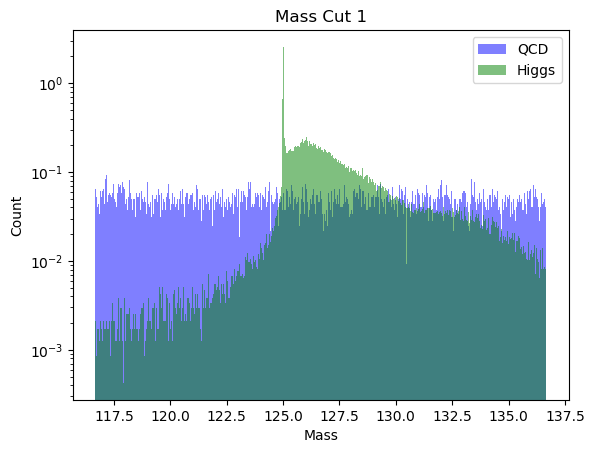

Expected Significance:  3.4994274916416646 sigma


In [5]:
mu = statistics.mean(higgs['mass'][:])

bins = 800
bottom = mu - 10
upper = mu + 10

background1 = list(filter(lambda a: a >= bottom and a <= upper, qcd['mass'][:]))
cut1 = list(filter(lambda a: a >= bottom and a <= upper, higgs['mass'][:]))
    
plt.figure()
plt.hist(background1[:], bins, alpha=0.5, color="blue", density = True, label='QCD')
plt.hist(cut1[:] , bins, alpha=0.5, density = True, color="green", label='Higgs')
plt.title('Mass Cut 1')
plt.legend(loc='best')
plt.xlabel('Mass')
plt.ylabel('Count')
plt.yscale("log")
plt.show()

nhiggs = (sum(cut1[:]) / sum(higgs['mass'][:]))*50
#print(nhiggs)
nqcd_root = ((sum(background1[:])/sum(qcd['mass'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Expected Significance: ", ratio, "sigma")

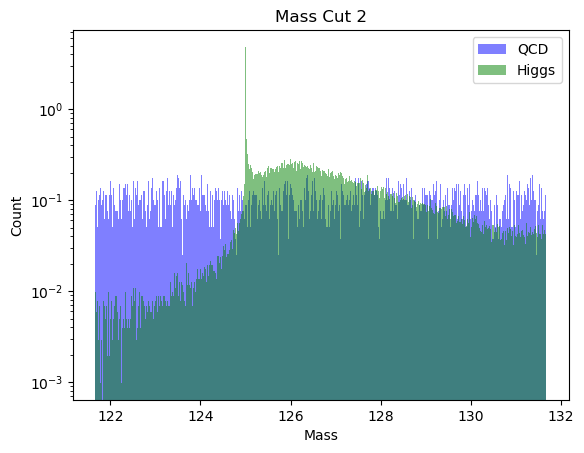

Expected Significance:  4.282960397507615 sigma


In [6]:
bottom = mu - 5
upper = mu + 5

background1 = list(filter(lambda a: a >= bottom and a <= upper, qcd['mass'][:]))
cut1 = list(filter(lambda a: a >= bottom and a <= upper, higgs['mass'][:]))
    
plt.figure()
plt.hist(background1[:], bins, alpha=0.5, color="blue", density = True, label='QCD')
plt.hist(cut1[:] , bins, alpha=0.5, density = True, color="green", label='Higgs')


plt.title('Mass Cut 2')
plt.legend(loc='best')
plt.xlabel('Mass')
plt.ylabel('Count')
plt.yscale("log")
plt.show()

nhiggs = (sum(cut1[:]) / sum(higgs['mass'][:]))*50
#print(nhiggs)
nqcd_root = ((sum(background1[:])/sum(qcd['mass'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Expected Significance: ", ratio, "sigma")

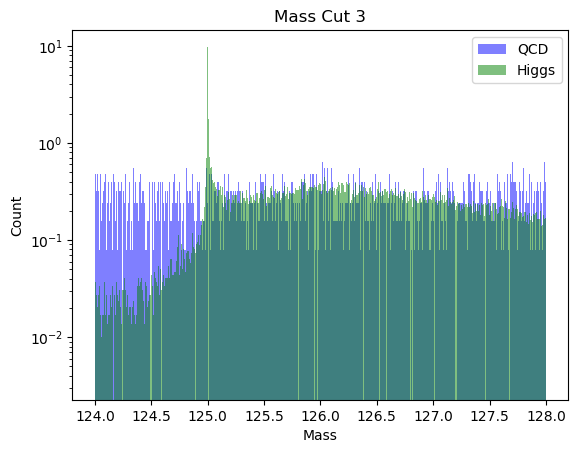

Expected Significance:  4.920056996800239 sigma


In [7]:
bottom = 124
upper = 128

background1 = list(filter(lambda a: a >= bottom and a <= upper, qcd['mass'][:]))
cut1 = list(filter(lambda a: a >= bottom and a <= upper, higgs['mass'][:]))
    
plt.figure()
plt.hist(background1[:], bins, alpha=0.5, color="blue", density = True, label='QCD')
plt.hist(cut1[:] , bins, alpha=0.5, density = True, color="green", label='Higgs')


plt.title('Mass Cut 3')
plt.legend(loc='best')
plt.xlabel('Mass')
plt.ylabel('Count')
plt.yscale("log")
plt.show()

nhiggs = (sum(cut1[:]) / sum(higgs['mass'][:]))*50

nqcd_root = ((sum(background1[:])/sum(qcd['mass'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Expected Significance: ", ratio, "sigma")


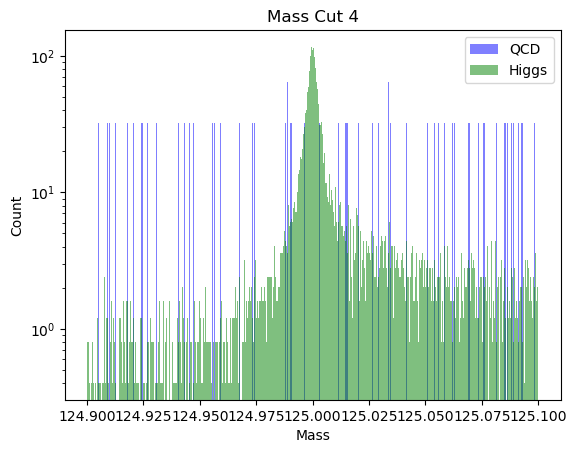

Expected Significance:  3.686324662014547 sigma


In [8]:
bottom = 124.9
upper = 125.1

background1 = list(filter(lambda a: a >= bottom and a <= upper, qcd['mass'][:]))
cut1 = list(filter(lambda a: a >= bottom and a <= upper, higgs['mass'][:]))
    
plt.figure()
plt.hist(background1[:], bins, alpha=0.5, color="blue", density = True, label='QCD')
plt.hist(cut1[:] , bins, alpha=0.5, density = True, color="green", label='Higgs')

plt.xlabel('Mass')
plt.ylabel('Count')
plt.yscale("log")
plt.title('Mass Cut 4')
plt.legend(loc='best')
plt.show()

nhiggs = (sum(cut1[:]) / sum(higgs['mass'][:]))*50
#print(nhiggs)
nqcd_root = ((sum(background1[:])/sum(qcd['mass'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Expected Significance: ", ratio, "sigma")

After trying to cut the data systematically by taking data only a certain amount of SD away from the mean of the signal data, I decided based on my eyesight that shown above the best bounds was from 124 to 128 which yielded the highest expected significance ratio (about 3.69 sigma). Which makes sense because overall that one cannot trim too much data because then you are cutting more of the signal dataset than the background which was learned several labs ago.

# Problem 3(set A)
There are several features to test. Eta, 2-point ECF, 3-point ECF, 3 to 3 point ECF, angularity, 1-subjettiness, 2-subjettiness, 3-subjettiness, 21-subjettiness, 32-subjettiness, transverse momentum, and phi. And we will look every one of them.

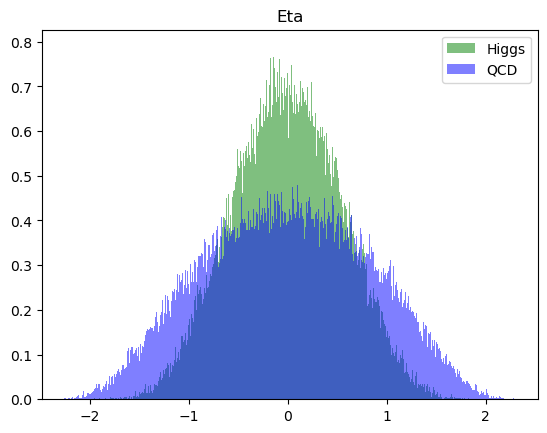

NHiggs:  50.0
(√NQCD):  44.721359549995796
ratio:  1.118033988749895


In [9]:
plt.hist(higgs['eta'][:], bins, alpha=0.5, color="green", density = True, label='Higgs')
plt.hist(qcd['eta'][:] , bins, alpha=0.5, density = True, color="blue", label='QCD')

plt.title('Eta')
plt.legend(loc='best')
plt.show()

nhiggs = (sum(higgs['eta'][:]) / sum(higgs['eta'][:]))*50
nqcd_sqrt = ((sum(qcd['eta'][:])/sum(qcd['eta'][:]))*2000)**(0.5)
print("NHiggs: ", nhiggs)
print("(√NQCD): ", nqcd_sqrt)
print("ratio: ", nhiggs/nqcd_sqrt)

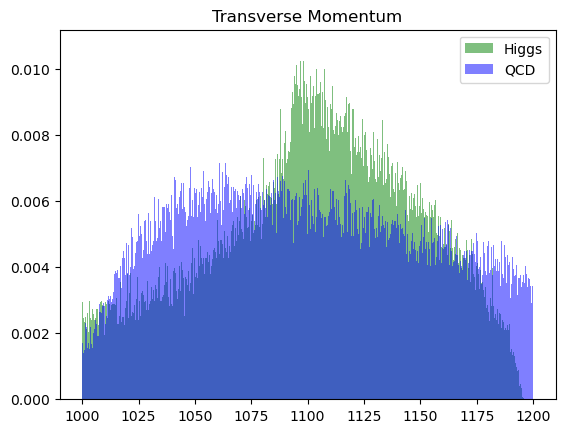

In [10]:
plt.hist(higgs['pt'][:], bins, alpha=0.5, color="green", density = True, label='Higgs')
plt.hist(qcd['pt'][:] , bins, alpha=0.5, density = True, color="blue", label='QCD')

plt.title('Transverse Momentum')
plt.legend(loc='best')
plt.show()

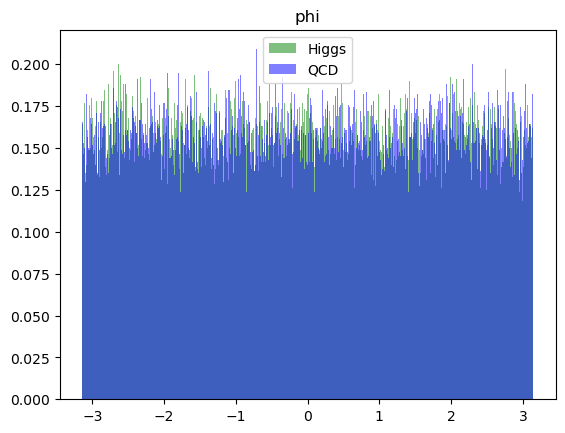

NHiggs:  50.0
(√NQCD):  44.721359549995796
ratio:  1.118033988749895


In [11]:
plt.hist(higgs['phi'][:], bins, alpha=0.5, color="green", density = True, label='Higgs')
plt.hist(qcd['phi'][:] , bins, alpha=0.5, density = True, color="blue", label='QCD')

plt.title('phi')
plt.legend(loc='best')
plt.show()

nhiggs = (sum(higgs['phi'][:]) / sum(higgs['phi'][:]))*50
nqcd_sqrt = ((sum(qcd['phi'][:])/sum(qcd['phi'][:]))*2000)**(0.5)
print("NHiggs: ", nhiggs)
print("(√NQCD): ", nqcd_sqrt)
print("ratio: ", nhiggs/nqcd_sqrt)

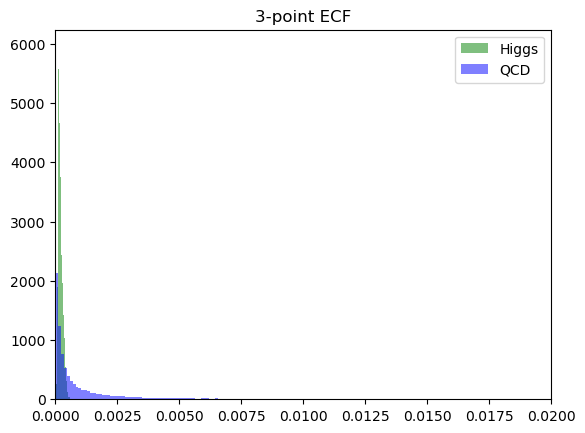

NHiggs:  50.0
(√NQCD):  44.721359549995796
ratio:  1.118033988749895


In [12]:
plt.hist(higgs['ee3'][:], bins, alpha=0.5, color="green", density = True, label='Higgs')
plt.hist(qcd['ee3'][:] , bins, alpha=0.5, density = True, color="blue", label='QCD')

plt.title('3-point ECF')
plt.legend(loc='best')
plt.xlim(0, 0.02)
plt.show()

nhiggs = (sum(higgs['ee3'][:]) / sum(higgs['ee3'][:]))*50
nqcd_sqrt = ((sum(qcd['ee3'][:])/sum(qcd['ee3'][:]))*2000)**(0.5)
print("NHiggs: ", nhiggs)
print("(√NQCD): ", nqcd_sqrt)
print("ratio: ", nhiggs/nqcd_sqrt)

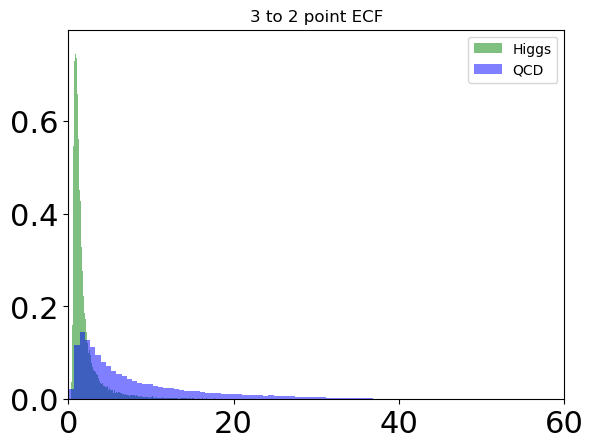

NHiggs:  50.0
(√NQCD):  44.721359549995796
ratio:  1.118033988749895


In [13]:
plt.hist(higgs['d2'][:], bins, alpha=0.5, color="green", density = True, label='Higgs')
plt.hist(qcd['d2'][:] , bins, alpha=0.5, density = True, color="blue", label='QCD')
plt.tick_params(labelsize = 22)
plt.title('3 to 2 point ECF')
plt.legend(loc='best')
plt.xlim(0, 60)
plt.show()

nhiggs = (sum(higgs['d2'][:]) / sum(higgs['d2'][:]))*50
nqcd_sqrt = ((sum(qcd['d2'][:])/sum(qcd['d2'][:]))*2000)**(0.5)
print("NHiggs: ", nhiggs)
print("(√NQCD): ", nqcd_sqrt)
print("ratio: ", nhiggs/nqcd_sqrt)

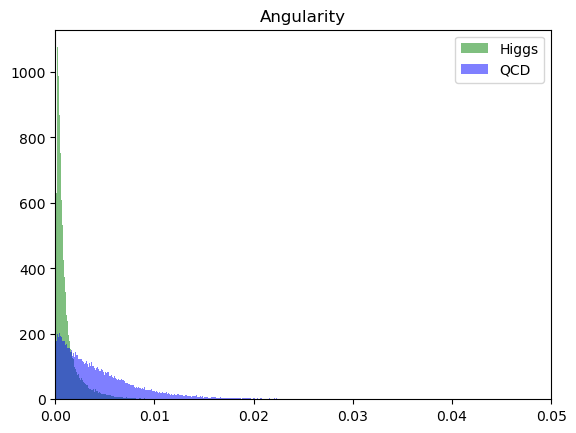

NHiggs:  50.0
(√NQCD):  44.721359549995796
ratio:  1.118033988749895


In [14]:
plt.hist(higgs['angularity'][:], bins, alpha=0.5, color="green", density = True, label='Higgs')
plt.hist(qcd['angularity'][:] , bins, alpha=0.5, density = True, color="blue", label='QCD')

plt.title('Angularity')
plt.legend(loc='best')
plt.xlim(0, .05)
plt.show()

nhiggs = (sum(higgs['angularity'][:]) / sum(higgs['angularity'][:]))*50
nqcd_sqrt = ((sum(qcd['angularity'][:])/sum(qcd['angularity'][:]))*2000)**(0.5)
print("NHiggs: ", nhiggs)
print("(√NQCD): ", nqcd_sqrt)
print("ratio: ", nhiggs/nqcd_sqrt)

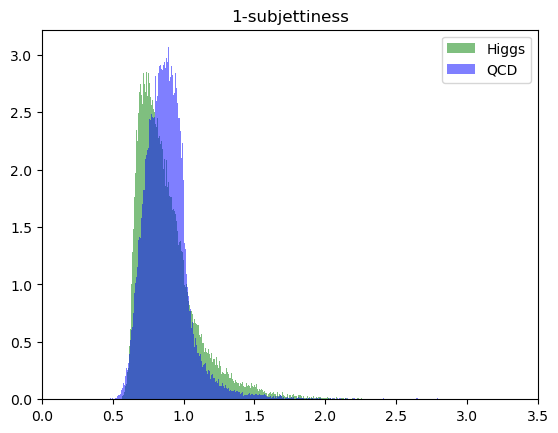

NHiggs:  50.0
(√NQCD):  44.721359549995796
ratio:  1.118033988749895


In [15]:
plt.hist(higgs['t1'][:], bins, alpha=0.5, color="green", density = True, label='Higgs')
plt.hist(qcd['t1'][:] , bins, alpha=0.5, density = True, color="blue", label='QCD')

plt.title('1-subjettiness')
plt.legend(loc='best')
plt.xlim(0, 3.5)
plt.show()

nhiggs = (sum(higgs['t1'][:]) / sum(higgs['t1'][:]))*50
nqcd_sqrt = ((sum(qcd['t1'][:])/sum(qcd['t1'][:]))*2000)**(0.5)
print("NHiggs: ", nhiggs)
print("(√NQCD): ", nqcd_sqrt)
print("ratio: ", nhiggs/nqcd_sqrt)

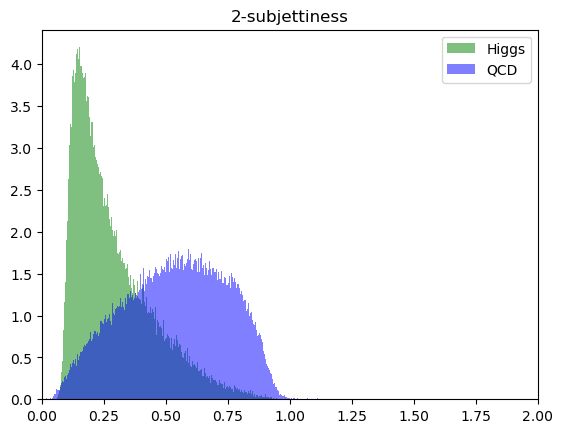

NHiggs:  50.0
(√NQCD):  44.721359549995796
ratio:  1.118033988749895


In [16]:
plt.hist(higgs['t2'][:], bins, alpha=0.5, color="green", density = True, label='Higgs')
plt.hist(qcd['t2'][:] , bins, alpha=0.5, density = True, color="blue", label='QCD')

plt.title('2-subjettiness')
plt.legend(loc='best')
plt.xlim(0, 2)
plt.show()

nhiggs = (sum(higgs['t2'][:]) / sum(higgs['t2'][:]))*50
nqcd_sqrt = ((sum(qcd['t2'][:])/sum(qcd['t2'][:]))*2000)**(0.5)
print("NHiggs: ", nhiggs)
print("(√NQCD): ", nqcd_sqrt)
print("ratio: ", nhiggs/nqcd_sqrt) 

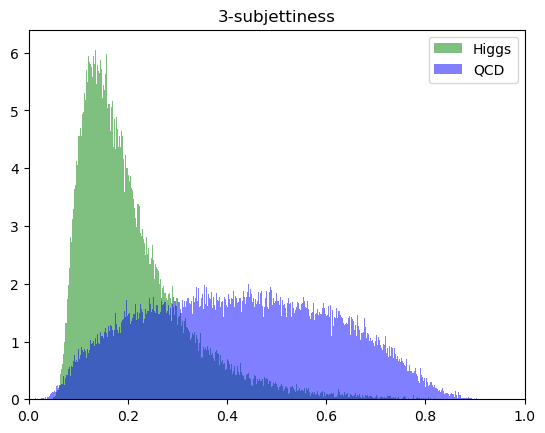

NHiggs:  50.0
(√NQCD):  44.721359549995796
ratio:  1.118033988749895


In [17]:
plt.hist(higgs['t3'][:], bins, alpha=0.5, color="green", density = True, label='Higgs')
plt.hist(qcd['t3'][:] , bins, alpha=0.5, density = True, color="blue", label='QCD')

plt.title('3-subjettiness')
plt.legend(loc='best')
plt.xlim(0, 1)
plt.show()

nhiggs = (sum(higgs['t3'][:]) / sum(higgs['t3'][:]))*50
nqcd_sqrt = ((sum(qcd['t3'][:])/sum(qcd['t3'][:]))*2000)**(0.5)
print("NHiggs: ", nhiggs)
print("(√NQCD): ", nqcd_sqrt)
print("ratio: ", nhiggs/nqcd_sqrt)

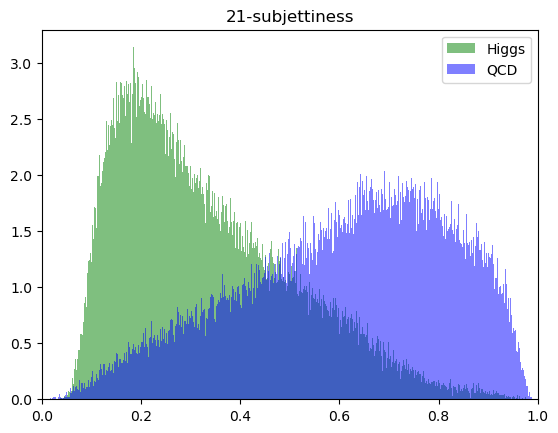

NHiggs:  50.0
(√NQCD):  44.721359549995796
ratio:  1.118033988749895


In [18]:
plt.hist(higgs['t21'][:], bins, alpha=0.5, color="green", density = True, label='Higgs')
plt.hist(qcd['t21'][:] , bins, alpha=0.5, density = True, color="blue", label='QCD')

plt.title('21-subjettiness')
plt.legend(loc='best')
plt.xlim(0, 1)
plt.show()

nhiggs = (sum(higgs['t21'][:]) / sum(higgs['t21'][:]))*50
nqcd_sqrt = ((sum(qcd['t21'][:])/sum(qcd['t21'][:]))*2000)**(0.5)
print("NHiggs: ", nhiggs)
print("(√NQCD): ", nqcd_sqrt)
print("ratio: ", nhiggs/nqcd_sqrt)

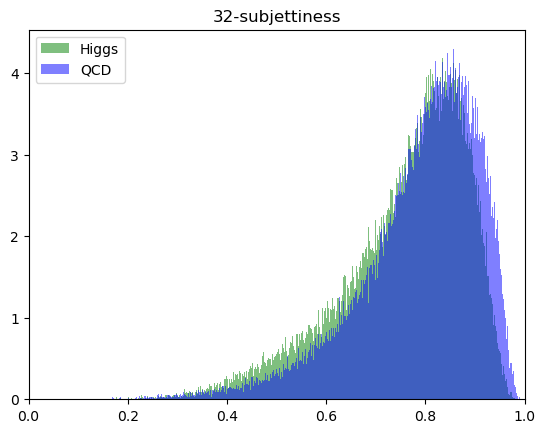

NHiggs:  50.0
(√NQCD):  44.721359549995796
ratio:  1.118033988749895


In [19]:
plt.hist(higgs['t32'][:], bins, alpha=0.5, color="green", density = True, label='Higgs')
plt.hist(qcd['t32'][:] , bins, alpha=0.5, density = True, color="blue", label='QCD')

plt.title('32-subjettiness')
plt.legend(loc='best')
plt.xlim(0, 1)
plt.show()

nhiggs = (sum(higgs['t32'][:]) / sum(higgs['t32'][:]))*50
nqcd_sqrt = ((sum(qcd['t32'][:])/sum(qcd['t32'][:]))*2000)**(0.5)
print("NHiggs: ", nhiggs)
print("(√NQCD): ", nqcd_sqrt)
print("ratio: ", nhiggs/nqcd_sqrt)

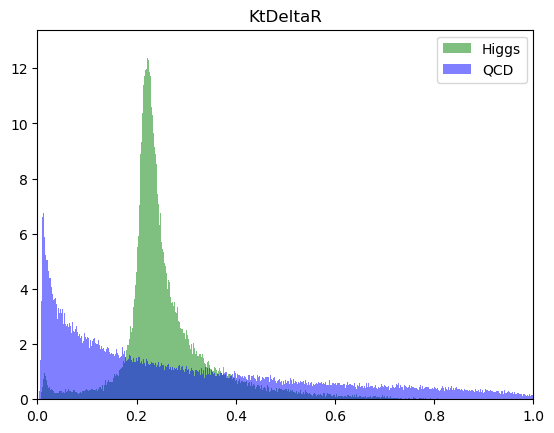

NHiggs:  50.0
(√NQCD):  44.721359549995796
ratio:  1.118033988749895


In [20]:
plt.hist(higgs['KtDeltaR'][:], bins, alpha=0.5, color="green", density = True, label='Higgs')
plt.hist(qcd['KtDeltaR'][:] , bins, alpha=0.5, density = True, color="blue", label='QCD')

plt.title('KtDeltaR')
plt.legend(loc='best')
plt.xlim(0, 1)
plt.show()

nhiggs = (sum(higgs['KtDeltaR'][:]) / sum(higgs['KtDeltaR'][:]))*50
nqcd_sqrt = ((sum(qcd['KtDeltaR'][:])/sum(qcd['KtDeltaR'][:]))*2000)**(0.5)
print("NHiggs: ", nhiggs)
print("(√NQCD): ", nqcd_sqrt)
print("ratio: ", nhiggs/nqcd_sqrt)

The expected significance all yielded the same value of 1.18 sigma which is less than the optimal cut for the mass.

Problem 3(set B)
We must identify additional features to further improve the expected significance. From the previous labs I will only be looking closely at features that already have have a decent amount of discrimination and making cuts on those. These would include: eta, 2-point ECF, 3-point ECF, 3 to 2 point ECF, theta, angularity, 3-subjettiness, 21-subjettiness, KtDeltaR, and 2-subjettiness). Using the good old eye ball test on the graphs from set A I concluded the initial cuts I will make to those graphs.



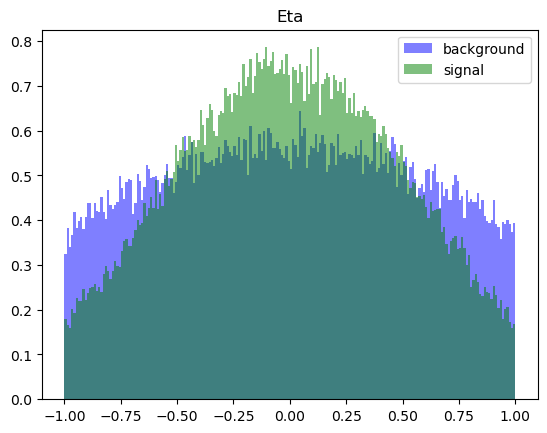

Expected Significance:  11.85289317947937 sigma


In [21]:
bottom = -1
upper = 1

background = list(filter(lambda a: a >= bottom and a <= upper, qcd['eta'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['eta'][:]))

plt.hist(background[:], 200, alpha=0.5, color="blue", density = True, label='background')
plt.hist(signal[:] , 200, alpha=0.5, density = True, color="green", label='signal')

plt.title('Eta')
plt.legend(loc='best')
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['eta'][:]))*50
nqcd_root = ((sum(background[:])/sum(qcd['eta'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Expected Significance: ", ratio, "sigma")

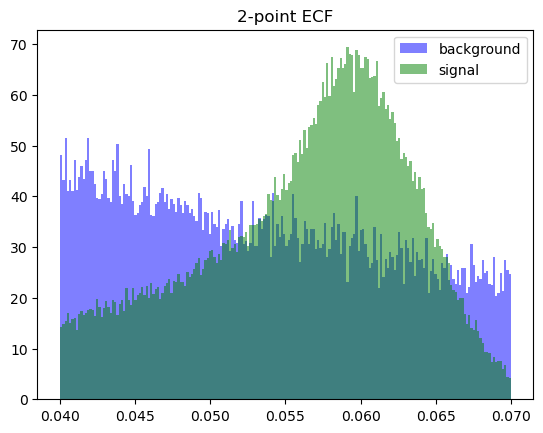

Expected Significance:  2.314097440860269 sigma


In [22]:
bottom = 0.04
upper = 0.07

background = list(filter(lambda a: a >= bottom and a <= upper, qcd['ee2'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['ee2'][:]))

plt.hist(background[:], 200, alpha=0.5, color="blue", density = True, label='background')
plt.hist(signal[:] , 200, alpha=0.5, density = True, color="green", label='signal')

plt.title('2-point ECF')
plt.legend(loc='best')
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['ee2'][:]))*50
nqcd_root = ((sum(background[:])/sum(qcd['ee2'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Expected Significance: ", ratio, "sigma")

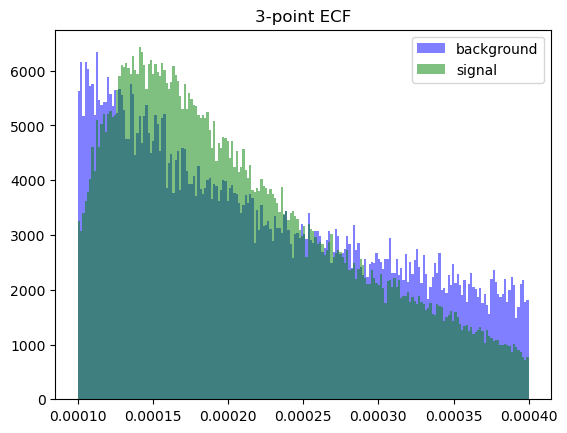

Expected Significance:  4.955930412215126 sigma


In [23]:
bottom = 0.0001
upper = 0.0004

background = list(filter(lambda a: a >= bottom and a <= upper, qcd['ee3'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['ee3'][:]))

plt.hist(background[:], 200, alpha=0.5, color="blue", density = True, label='background')
plt.hist(signal[:] , 200, alpha=0.5, density = True, color="green", label='signal')

plt.title('3-point ECF')
plt.legend(loc='best')
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['ee3'][:]))*50
nqcd_root = ((sum(background[:])/sum(qcd['ee3'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Expected Significance: ", ratio, "sigma")

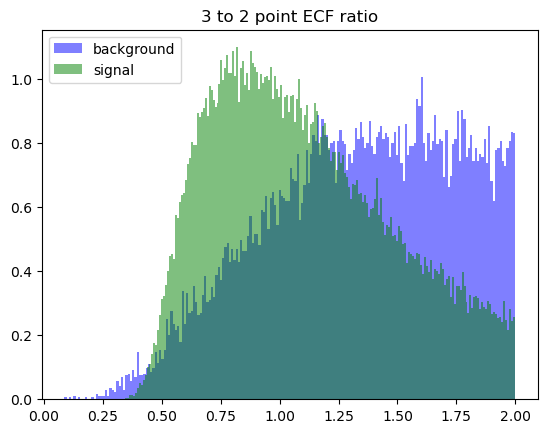

Expected Significance:  2.508399748105604 sigma


In [24]:
bottom = 0
upper = 2

background = list(filter(lambda a: a >= bottom and a <= upper, qcd['d2'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['d2'][:]))

plt.hist(background[:], 200, alpha=0.5, color="blue", density = True, label='background')
plt.hist(signal[:] , 200, alpha=0.5, density = True, color="green", label='signal')

plt.title('3 to 2 point ECF ratio')
plt.legend(loc='best')
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['d2'][:]))*50
nqcd_root = ((sum(background[:])/sum(qcd['d2'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Expected Significance: ", ratio, "sigma")

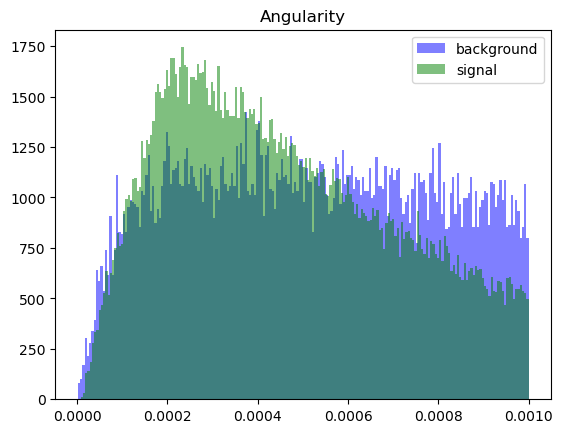

Expected Significance:  2.145767670275169 sigma


In [25]:
bottom = 0
upper = 0.001

background = list(filter(lambda a: a >= bottom and a <= upper, qcd['angularity'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['angularity'][:]))

plt.hist(background[:], 200, alpha=0.5, color="blue", density = True, label='background')
plt.hist(signal[:] , 200, alpha=0.5, density = True, color="green", label='signal')

plt.title('Angularity')
plt.legend(loc='best')
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['angularity'][:]))*50
nqcd_root = ((sum(background[:])/sum(qcd['angularity'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Expected Significance: ", ratio, "sigma")

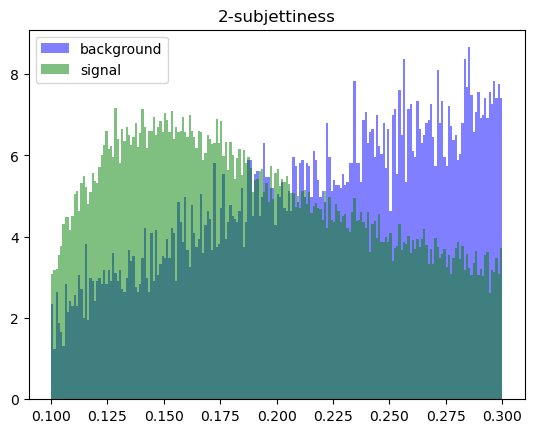

Expected Significance:  1.8569083189129998 sigma


In [26]:
bottom = 0.1
upper = 0.3

background = list(filter(lambda a: a >= bottom and a <= upper, qcd['t2'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['t2'][:]))

plt.hist(background[:], 200, alpha=0.5, color="blue", density = True, label='background')
plt.hist(signal[:] , 200, alpha=0.5, density = True, color="green", label='signal')

plt.title('2-subjettiness')
plt.legend(loc='best')
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['t2'][:]))*50
nqcd_root = ((sum(background[:])/sum(qcd['t2'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Expected Significance: ", ratio, "sigma")

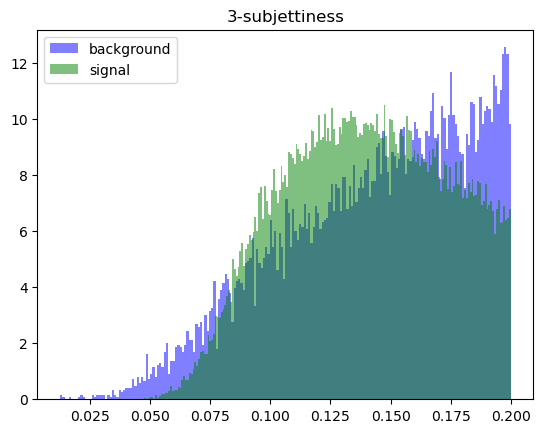

Expected Significance:  2.108465016203684 sigma


In [27]:
bottom = 0
upper = 0.2
background = list(filter(lambda a: a >= bottom and a <= upper, qcd['t3'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['t3'][:]))
plt.hist(background[:], 200, alpha=0.5, color="blue", density = True, label='background')
plt.hist(signal[:] , 200, alpha=0.5, density = True, color="green", label='signal')

plt.title('3-subjettiness')
plt.legend(loc='best')
plt.show()
nhiggs = (sum(signal[:]) / sum(higgs['t3'][:]))*50
nqcd_root = ((sum(background[:])/sum(qcd['t3'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Expected Significance: ", ratio, "sigma")

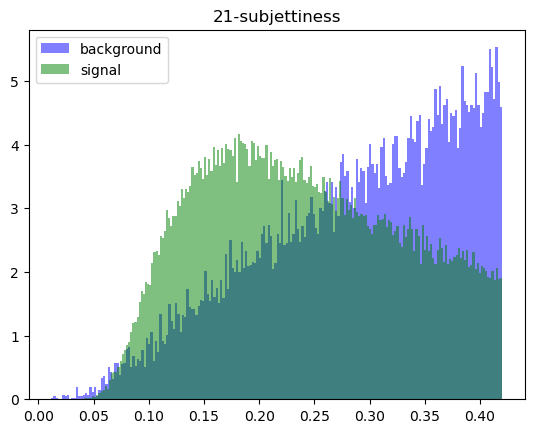

Expected Significance:  1.8464241069921776 sigma


In [28]:
bottom = 0
upper = 0.42

background = list(filter(lambda a: a >= bottom and a <= upper, qcd['t21'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['t21'][:]))

plt.hist(background[:], 200, alpha=0.5, color="blue", density = True, label='background')
plt.hist(signal[:] , 200, alpha=0.5, density = True, color="green", label='signal')

plt.title('21-subjettiness')
plt.legend(loc='best')
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['t21'][:]))*50
nqcd_root = ((sum(background[:])/sum(qcd['t21'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Expected Significance: ", ratio, "sigma")

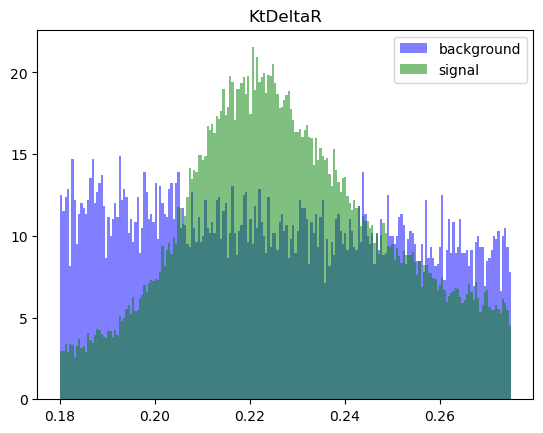

Expected Significance:  2.2455928282166866 sigma


In [29]:
bottom = 0.18
upper = 0.275

background = list(filter(lambda a: a >= bottom and a <= upper, qcd['KtDeltaR'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['KtDeltaR'][:]))

plt.hist(background[:], 200, alpha=0.5, color="blue", density = True, label='background')
plt.hist(signal[:] , 200, alpha=0.5, density = True, color="green", label='signal')

plt.title('KtDeltaR')
plt.legend(loc='best')
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['t21'][:]))*50
nqcd_root = ((sum(background[:])/sum(qcd['t21'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Expected Significance: ", ratio, "sigma")

While these cuts are created my initial guess wasn't good enough, they were modified in order to find a better significance ratio. The Eta cut was the best cut by far, 11.85 sigmas, which is significantly larger than expected. The 3-point ECF was pretty high with around 4.95 sigma. This made more sense comparing to the output given from the eta cut.

# Problem 4
3 point ECF and the mass are the two key features that would help to get the best significance. Used from problem 3. Initially the the significance ratio before the event selection was 1.118 sigma which was consistent with all the features before making the cuts. And this could. e explained that we werer given 100k jets for sigmal and 100k jets for the background. Which would yield a ratio of 1. When making data cuts to features with a larger degree of discrimination the significance ratio increases. In the mass example if we were to cut it between 124.5 and 128 the significance went up to 5.21 sigma. For the 3-point ECF, making a cut in the range of 0.001 and 0.004, the significance went up to 4.96 sigma. 

In [30]:
nhiggs = (sum(higgs['mass'][:]) / sum(higgs['mass'][:]))*50
nqcd_sqrt = ((sum(qcd['mass'][:])/sum(qcd['mass'][:]))*2000)**(0.5)
print("NHiggs: ", nhiggs)
print("(√NQCD): ", nqcd_sqrt)
print("Ratio before Event Selection: ", nhiggs/nqcd_sqrt)

bottom = 124.5
upper = 128
background = list(filter(lambda a: a >= bottom and a <= upper, qcd['mass'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['mass'][:]))
nhiggs = (sum(signal) / sum(higgs['mass'][:]))*50
nqcd_sqrt = ((sum(background)/sum(qcd['mass'][:]))*2000)**(0.5)

print("Ratio after Event Selection(mass): ", nhiggs/nqcd_sqrt)

bottom = 0.0001
upper = 0.0004
background = list(filter(lambda a: a >= bottom and a <= upper, qcd['ee3'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['ee3'][:]))
nhiggs = (sum(signal[:]) / sum(higgs['ee3'][:]))*50
nqcd_sqrt = ((sum(background[:])/sum(qcd['ee3'][:]))*2000)**(0.5)

print("Ratio after Event Selection(ee3): ", nhiggs/nqcd_sqrt)

NHiggs:  50.0
(√NQCD):  44.721359549995796
Ratio before Event Selection:  1.118033988749895
Ratio after Event Selection(mass):  5.211531599621536
Ratio after Event Selection(ee3):  4.955930412215126


# Lab 8

In [31]:
# first we read data

In [32]:
highLumi = pd.read_hdf('data_highLumi_pt_1000_1200.h5')
lowLumi = pd.read_hdf('data_lowLumi_pt_1000_1200.h5')

# Problem 1
Red represents the high luminosity dataset, green represents the expected signal data and blue represents the expected background dataset.To better show the trend and relationship between observed, signal and background the x-axis has been truncated between 20 and 450 (eliminates vast amounts of white space). The y-axis has also been changed to a log plot to better highlight the differences and trends between the 3 datasets. As seen in the plot, the mass feature of the observed data closely follows the expected background.

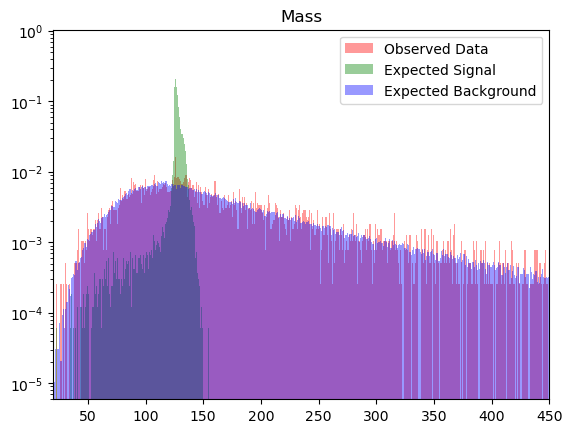

NHiggs:  50.0
(√NObserved):  44.721359549995796
Observed Significance:  1.118033988749895 sigma


In [33]:
bins = 800
plt.hist(highLumi['mass'][:], bins, alpha=0.4, color='red', density = True, label="Observed Data")
plt.hist(higgs['mass'][:], bins, alpha=0.4, color="green", density = True, label="Expected Signal")
plt.hist(qcd['mass'][:] , bins, alpha=0.4, density = True, color="blue", label="Expected Background")


plt.title('Mass')
plt.legend(loc='best')
plt.xlim(20,450)
plt.yscale('log')
plt.show()

nhiggs = (sum(higgs['mass'][:]) / sum(higgs['mass'][:]))*50
nqcd_sqrt = ((sum(highLumi['mass'][:])/sum(highLumi['mass'][:]))*2000)**(0.5)
print("NHiggs: ", nhiggs)
print("(√NObserved): ", nqcd_sqrt)
ratio =  nhiggs/nqcd_sqrt
print("Observed Significance: ", ratio, "sigma")

Looks like the obeserved data is much more spiky than the expected background data. This could mean that the transverse momentum of PP collisions is not as predicatable as the expected background makes it out to be. And also certain values of transverse momentum are more favorable than others.

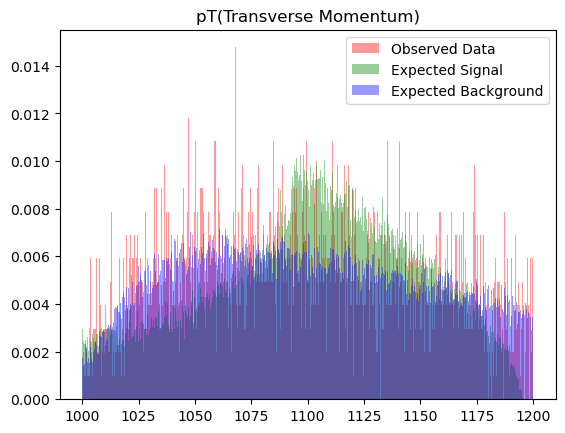

In [34]:
bins = 800
plt.hist(highLumi['pt'][:], bins, alpha=0.4, color='red', density = True, label="Observed Data")
plt.hist(higgs['pt'][:], bins, alpha=0.4, color="green", density = True, label="Expected Signal")
plt.hist(qcd['pt'][:] , bins, alpha=0.4, density = True, color="blue", label="Expected Background")

plt.title('pT(Transverse Momentum)')
plt.legend(loc='best')
plt.show()

Observed data is spiky but generally follows the background data(looks relatively normal). It is interesting to note that the highest spikes are around the mean(indicating that some values are indeed favored for the eta angle).

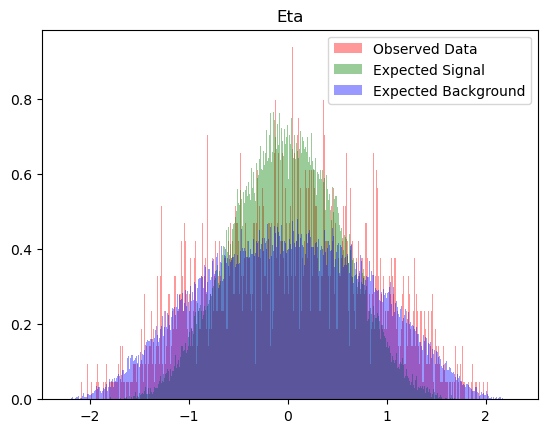

In [39]:
bins = 800
plt.hist(highLumi['eta'][:], bins, alpha=0.4, color='red', density = True, label="Observed Data")
plt.hist(higgs['eta'][:], bins, alpha=0.4, color="green", density = True, label="Expected Signal")
plt.hist(qcd['eta'][:] , bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")

plt.title('Eta') 
plt.show()

Both of the expected background and expecetd signal creates an evenly random spread for the phi angle. However the observed data is spiky and not very consistent.

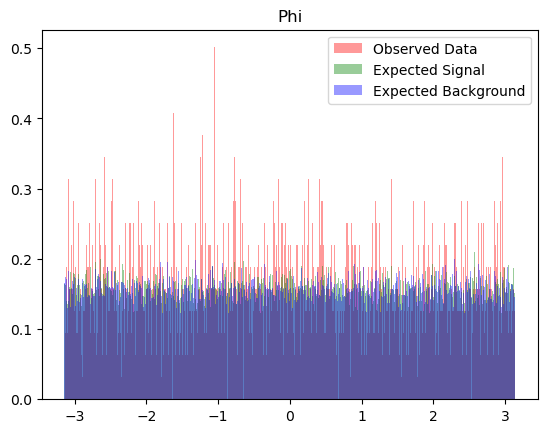

In [40]:
bins = 800
plt.hist(highLumi['phi'][:], bins, alpha=0.4, color='red', density = True, label="Observed Data")
plt.hist(higgs['phi'][:], bins, alpha=0.4, color="green", density = True, label="Expected Signal")
plt.hist(qcd['phi'][:] , bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")

plt.title('Phi') 
plt.show()

For 2point ECF, I chose to use logscale and limited the x-axis between -.001 and 0.23 to show a better trend of the expecetd background and observed data. As per usual the observed data is spiky, be in general follows the expected background trend.

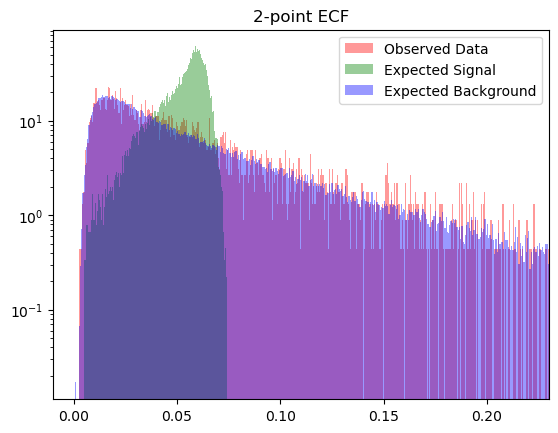

In [41]:
bins = 800
plt.hist(highLumi['ee2'][:], bins, alpha=0.4, color='red', density = True, label="Observed Data")
plt.hist(higgs['ee2'][:], bins, alpha=0.4, color="green", density = True, label="Expected Signal")
plt.hist(qcd['ee2'][:] , bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")

plt.title('2-point ECF') 
plt.yscale("log")
plt.xlim(-0.01, 0.23)
plt.show()

For the 3point ECF I used a log plot. and set the x-limit from -.001 to 0.008 to show a better trend. It's interesting that the expected background predicts spikiness and outliers, but the observed data starts getting spiky much soonner than the expected background. The outlier values are also relatively favored since their spikes are higher than the expected background spikes.

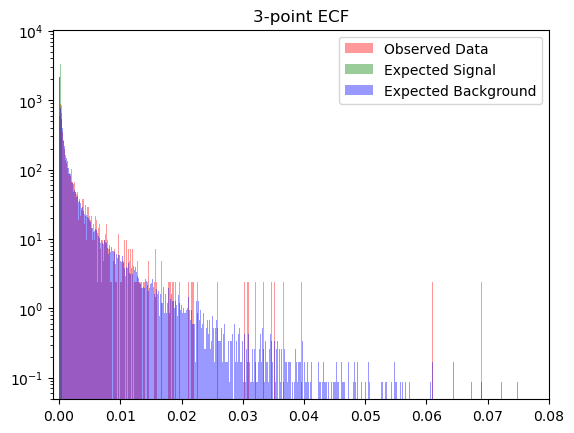

In [42]:
bins = 800
plt.hist(highLumi['ee3'][:], bins, alpha=0.4, color='red', density = True, label="Observed Data")
plt.hist(higgs['ee3'][:], bins, alpha=0.4, color="green", density = True, label="Expected Signal")
plt.hist(qcd['ee3'][:] , bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")


plt.title('3-point ECF') 
plt.yscale("log")
plt.xlim(-0.001, 0.08)

plt.show()

Plotted on a log scale, and limited between 0 to 100 to better show trend. Observed generally follows expected background up until 38ish. It is also interesting to note that the observed data starts getting spiky approximately when the expected signal also gets spiky. Once again we see the same trend that specific outliers are favored (relatively high probability), as they rise above the expected background.

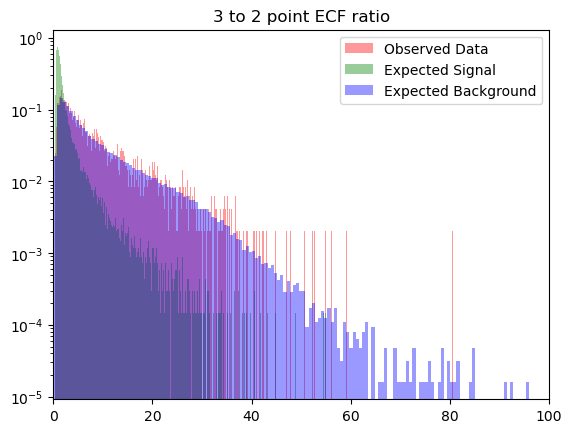

In [43]:
bins = 800
plt.hist(highLumi['d2'][:], bins, alpha=0.4, color='red', density = True, label="Observed Data")
plt.hist(higgs['d2'][:], bins, alpha=0.4, color="green", density = True, label="Expected Signal")
plt.hist(qcd['d2'][:] , bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")
plt.yscale("log")
plt.xlim(0,100)

plt.title('3 to 2 point ECF ratio') 
plt.show()

Angularity is plotted on the log scale and between -0.001 and 0.02 to better analyze trend. Same trend is observed where the observed data generally follows the expected background, but as we get further away from the mean, the observed data becomes increasingly more spiky. As it gets spiky, certain values consistently rise above the expected background.

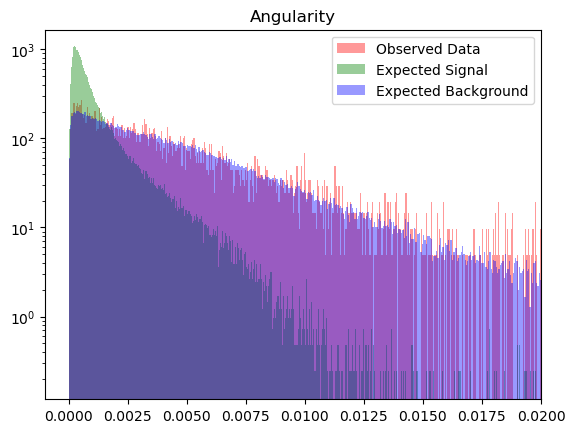

In [45]:
bins = 800
plt.hist(highLumi['angularity'][:], bins, alpha=0.4, color='red', density = True, label="Observed Data")
plt.hist(higgs['angularity'][:], bins, alpha=0.4, color="green", density = True, label="Expected Signal")
plt.hist(qcd['angularity'][:] , bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")

plt.yscale("log")
plt.xlim(-0.001,0.02)
plt.title('Angularity') 
plt.show()

1-subjettiness is limited between 0.5 and 2. The observed data does a great job of following the expected background, there is minimal overlap between the observed data and the expected signal. Looking down this is true for 2,3,21,32 subjettiness and KtDeltaR. The observed data is always more spiky (inconsistent), but generally tries to follow the expected background, and doesn't overlap with the expected signal.

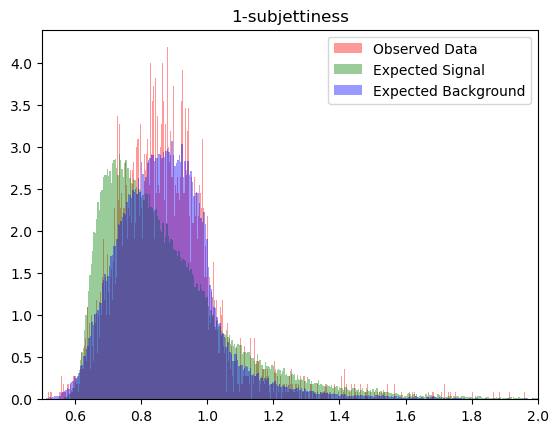

In [47]:
bins = 800
plt.hist(highLumi['t1'][:], bins, alpha=0.4, color='red', density = True, label="Observed Data")
plt.hist(higgs['t1'][:], bins, alpha=0.4, color="green", density = True, label="Expected Signal")
plt.hist(qcd['t1'][:] , bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")
plt.xlim(0.5,2)

plt.title('1-subjettiness') 
plt.show()

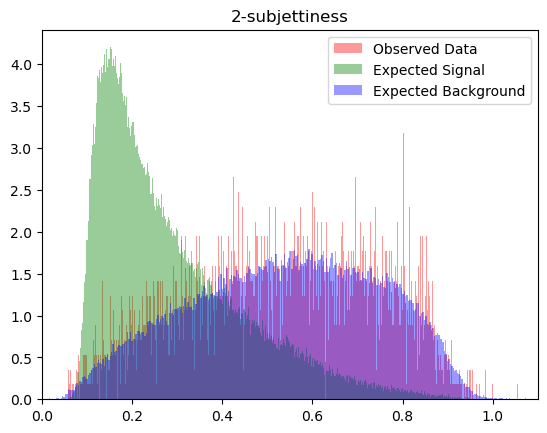

In [48]:
bins = 800
plt.hist(highLumi['t2'][:], bins, alpha=0.4, color='red', density = True, label="Observed Data")
plt.hist(higgs['t2'][:], bins, alpha=0.4, color="green", density = True, label="Expected Signal")
plt.hist(qcd['t2'][:] , bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")
plt.xlim(0,1.1)

plt.title('2-subjettiness') 
plt.show()

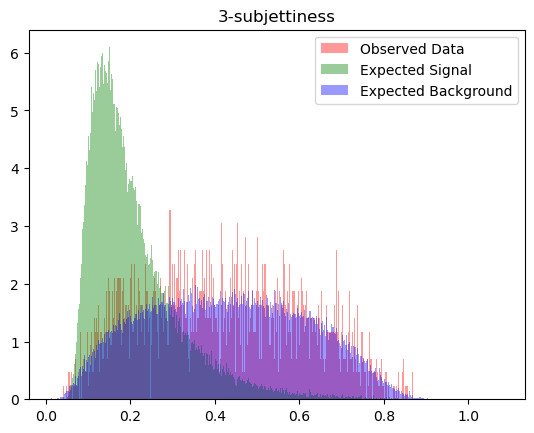

In [49]:
bins = 800
plt.hist(highLumi['t3'][:], bins, alpha=0.4, color='red', density = True, label="Observed Data")
plt.hist(higgs['t3'][:], bins, alpha=0.4, color="green", density = True, label="Expected Signal")
plt.hist(qcd['t3'][:] , bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")

plt.title('3-subjettiness') 
plt.show()

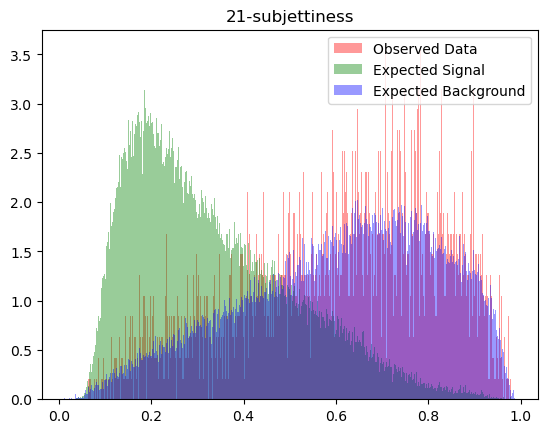

In [50]:
bins = 800
plt.hist(highLumi['t21'][:], bins, alpha=0.4, color='red', density = True, label="Observed Data")
plt.hist(higgs['t21'][:], bins, alpha=0.4, color="green", density = True, label="Expected Signal")
plt.hist(qcd['t21'][:] , bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")

plt.title('21-subjettiness') 
plt.show()

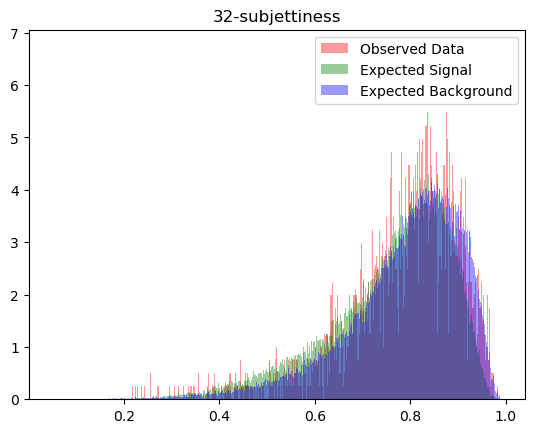

In [51]:
bins = 800
plt.hist(highLumi['t32'][:], bins, alpha=0.4, color='red', density = True, label="Observed Data")
plt.hist(higgs['t32'][:], bins, alpha=0.4, color="green", density = True, label="Expected Signal")
plt.hist(qcd['t32'][:] , bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")

plt.title('32-subjettiness') 
plt.show()

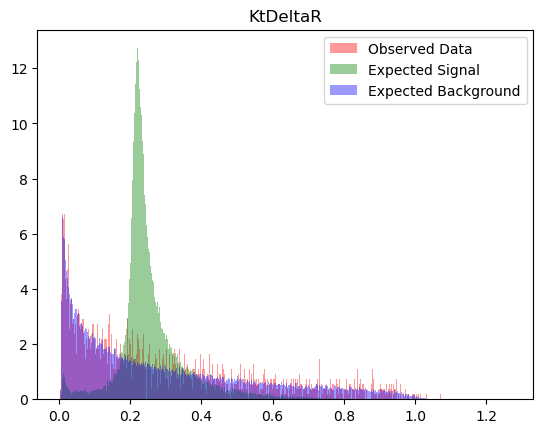

In [52]:
bins = 800
plt.hist(highLumi['KtDeltaR'][:], bins, alpha=0.4, color='red', density = True, label="Observed Data")
plt.hist(higgs['KtDeltaR'][:], bins, alpha=0.4, color="green", density = True, label="Expected Signal")
plt.hist(qcd['KtDeltaR'][:] , bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")

plt.title('KtDeltaR') 
plt.show()

General analysis is that across all features, the high luminosity observed data follows the expected background, but it is also much more spiky and inconsistent compared to the nice expected trends the qcd background data set predicts. The expected significance of the expected signal and background is 1.118033988749895 sigma. While the observed significance before mass cuts is 1.118033988749895 sigma. These are completely equivalent and that is to be expected because the calculation for significance uses a ratio of data points eliminated vs. data points maintained. Since no mass cuts have been made yet, both the observed and background data start with 100k data points, resulting in equal significance values. In lab 7 I went through the expected signal and background plots and chose 10 features that showed to be highly discriminatory, and applied event selection to said features. This event selection allowed for the expected significance of the tested features to go up. I will use these same 10 features, with tested optimal cuts, and replace the background with the high luminosity observed data to evaluate how these cuts affect the observed significance of our dataset compared to the default expectation value of: 1.118 sigma.

Making a mass cut from 124.9 to 125.1 (optimal for qcd), shows that the expected background predicts the spiky nature of the observed data, but not to the same degree. Certain mass values are extremely favored, and this generally points to the discretized nature of mass values.

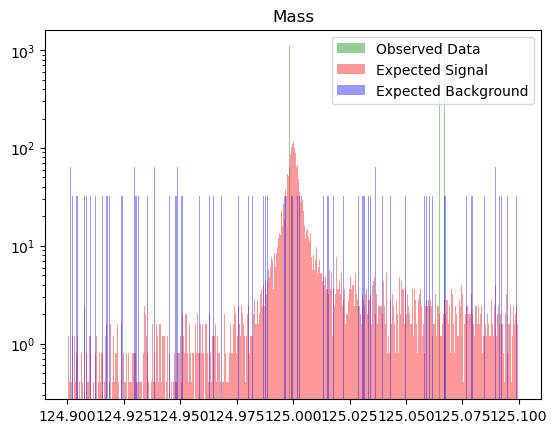

Observed Significance:  2.7658190294545437 sigma


In [53]:
bottom = 124.9
upper = 125.1

observed = list(filter(lambda a: a >= bottom and a <= upper, highLumi['mass'][:]))
background = list(filter(lambda a: a >= bottom and a <= upper, qcd['mass'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['mass'][:]))

bins = 800
plt.hist(observed[:], bins, alpha=0.4, color='green', density = True, label="Observed Data")
plt.hist(signal[:], bins, alpha=0.4, color="red", density = True, label="Expected Signal")
plt.hist(background[:], bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")
plt.yscale("log")

plt.title('Mass') 
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['mass'][:]))*50
nqcd_root = ((sum(observed[:])/sum(highLumi['mass'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Observed Significance: ", ratio, "sigma")

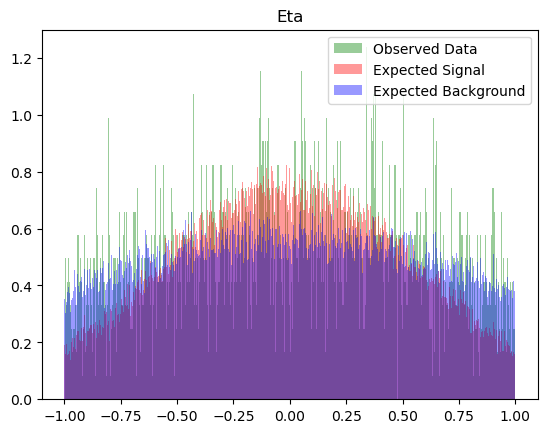

Observed Significance:  37.256496739244646 sigma


In [54]:
bottom = -1
upper = 1

observed = list(filter(lambda a: a >= bottom and a <= upper, highLumi['eta'][:]))
background = list(filter(lambda a: a >= bottom and a <= upper, qcd['eta'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['eta'][:]))

bins = 500
plt.hist(observed[:], bins, alpha=0.4, color='green', density = True, label="Observed Data")
plt.hist(signal[:], bins, alpha=0.4, color="red", density = True, label="Expected Signal")
plt.hist(background[:], bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")

plt.title('Eta') 
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['eta'][:]))*50
nqcd_root = ((sum(observed[:])/sum(highLumi['eta'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Observed Significance: ", ratio, "sigma")

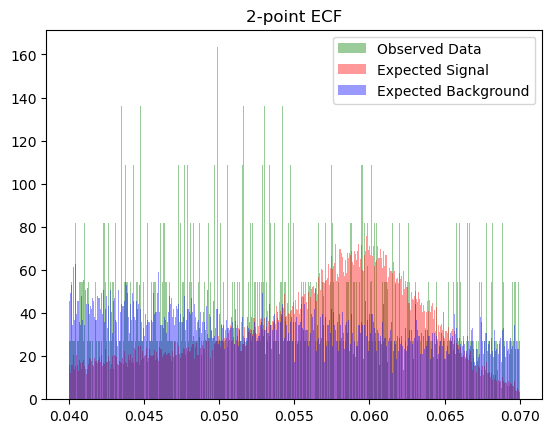

Observed Significance:  2.180447811129628 sigma


In [55]:
bottom = 0.04
upper = 0.07

observed = list(filter(lambda a: a >= bottom and a <= upper, highLumi['ee2'][:]))
background = list(filter(lambda a: a >= bottom and a <= upper, qcd['ee2'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['ee2'][:]))

bins = 800
plt.hist(observed[:], bins, alpha=0.4, color='green', density = True, label="Observed Data")
plt.hist(signal[:], bins, alpha=0.4, color="red", density = True, label="Expected Signal")
plt.hist(background[:], bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")

plt.title('2-point ECF') 
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['ee2'][:]))*50
nqcd_root = ((sum(observed[:])/sum(highLumi['ee2'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Observed Significance: ", ratio, "sigma")

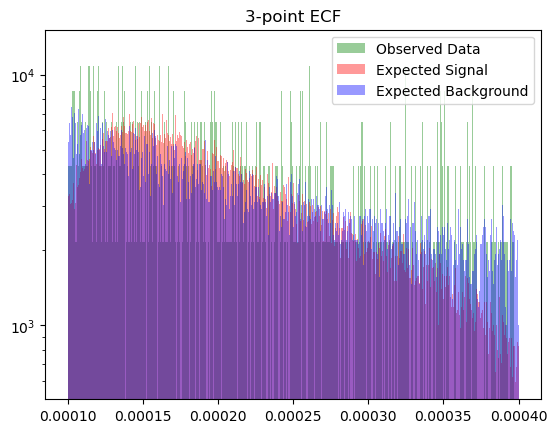

Observed Significance:  4.722421291673451 sigma


In [58]:
bottom = .0001
upper = .0004

observed = list(filter(lambda a: a >= bottom and a <= upper, highLumi['ee3'][:]))
background = list(filter(lambda a: a >= bottom and a <= upper, qcd['ee3'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['ee3'][:]))

bins = 800
plt.hist(observed[:], bins, alpha=0.4, color='green', density = True, label="Observed Data")
plt.hist(signal[:], bins, alpha=0.4, color="red", density = True, label="Expected Signal")
plt.hist(background[:], bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")

plt.yscale("log")
plt.title('3-point ECF') 
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['ee3'][:]))*50
nqcd_root = ((sum(observed[:])/sum(highLumi['ee3'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Observed Significance: ", ratio, "sigma")

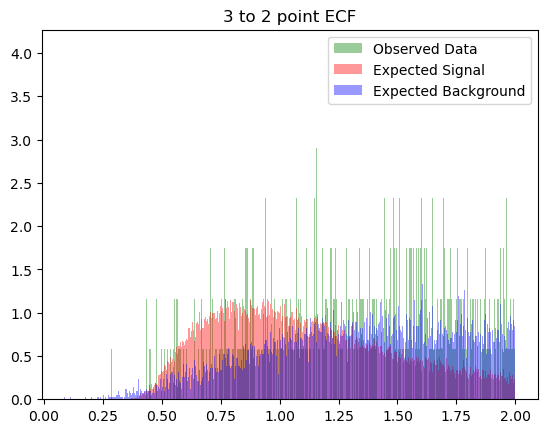

Observed Significance:  2.401966175382701 sigma


In [59]:
bottom = 0
upper = 2

observed = list(filter(lambda a: a >= bottom and a <= upper, highLumi['d2'][:]))
background = list(filter(lambda a: a >= bottom and a <= upper, qcd['d2'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['d2'][:]))

bins = 800
plt.hist(observed[:], bins, alpha=0.4, color='green', density = True, label="Observed Data")
plt.hist(signal[:], bins, alpha=0.4, color="red", density = True, label="Expected Signal")
plt.hist(background[:], bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")
plt.title('3 to 2 point ECF') 
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['d2'][:]))*50
nqcd_root = ((sum(observed[:])/sum(highLumi['d2'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Observed Significance: ", ratio, "sigma")

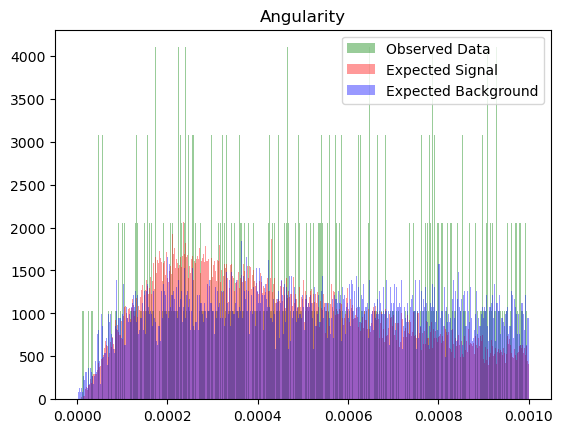

Observed Significance:  2.069853419419706 sigma


In [61]:
bottom = 0
upper = 0.001

observed = list(filter(lambda a: a >= bottom and a <= upper, highLumi['angularity'][:]))
background = list(filter(lambda a: a >= bottom and a <= upper, qcd['angularity'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['angularity'][:]))

bins = 800
plt.hist(observed[:], bins, alpha=0.4, color='green', density = True, label="Observed Data")
plt.hist(signal[:], bins, alpha=0.4, color="red", density = True, label="Expected Signal")
plt.hist(background[:], bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")

plt.title('Angularity') 
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['angularity'][:]))*50
nqcd_root = ((sum(observed[:])/sum(highLumi['angularity'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Observed Significance: ", ratio, "sigma")

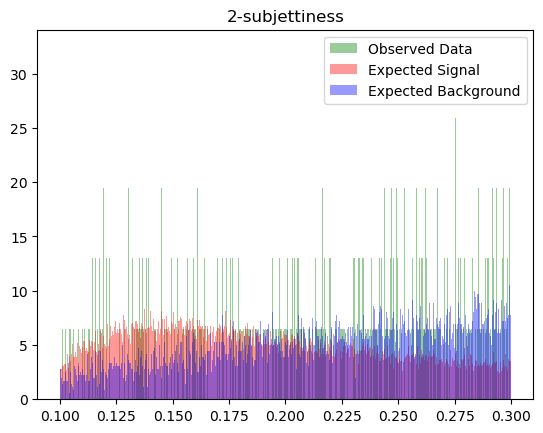

Observed Significance:  1.7999230544870488 sigma


In [62]:
bottom = 0.1
upper = 0.3

observed = list(filter(lambda a: a >= bottom and a <= upper, highLumi['t2'][:]))
background = list(filter(lambda a: a >= bottom and a <= upper, qcd['t2'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['t2'][:]))

bins = 800
plt.hist(observed[:], bins, alpha=0.4, color='green', density = True, label="Observed Data")
plt.hist(signal[:], bins, alpha=0.4, color="red", density = True, label="Expected Signal")
plt.hist(background[:], bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")

plt.title('2-subjettiness') 
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['t2'][:]))*50
nqcd_root = ((sum(observed[:])/sum(highLumi['t2'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Observed Significance: ", ratio, "sigma")

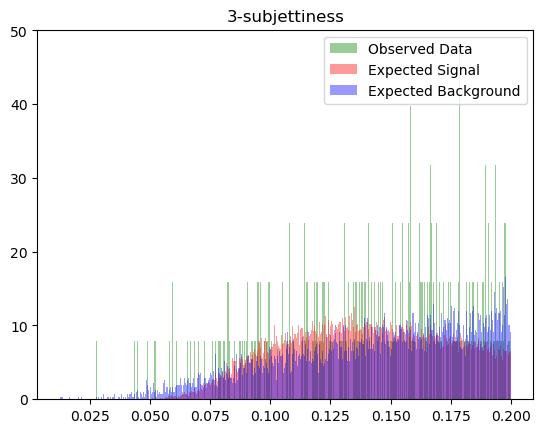

Observed Significance:  1.9985525238085557 sigma


In [63]:
bottom = 0
upper = 0.2

observed = list(filter(lambda a: a >= bottom and a <= upper, highLumi['t3'][:]))
background = list(filter(lambda a: a >= bottom and a <= upper, qcd['t3'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['t3'][:]))

bins = 800
plt.hist(observed[:], bins, alpha=0.4, color='green', density = True, label="Observed Data")
plt.hist(signal[:], bins, alpha=0.4, color="red", density = True, label="Expected Signal")
plt.hist(background[:], bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")

plt.title('3-subjettiness') 
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['t3'][:]))*50
nqcd_root = ((sum(observed[:])/sum(highLumi['t3'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Observed Significance: ", ratio, "sigma")

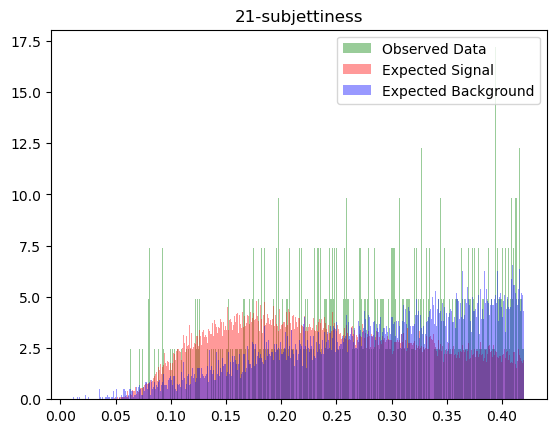

Observed Significance:  1.8139048984566601 sigma


In [64]:
bottom = 0
upper = 0.42

observed = list(filter(lambda a: a >= bottom and a <= upper, highLumi['t21'][:]))
background = list(filter(lambda a: a >= bottom and a <= upper, qcd['t21'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['t21'][:]))

bins = 800
plt.hist(observed[:], bins, alpha=0.4, color='green', density = True, label="Observed Data")
plt.hist(signal[:], bins, alpha=0.4, color="red", density = True, label="Expected Signal")
plt.hist(background[:], bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")

plt.title('21-subjettiness') 
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['t21'][:]))*50
nqcd_root = ((sum(observed[:])/sum(highLumi['t21'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Observed Significance: ", ratio, "sigma")

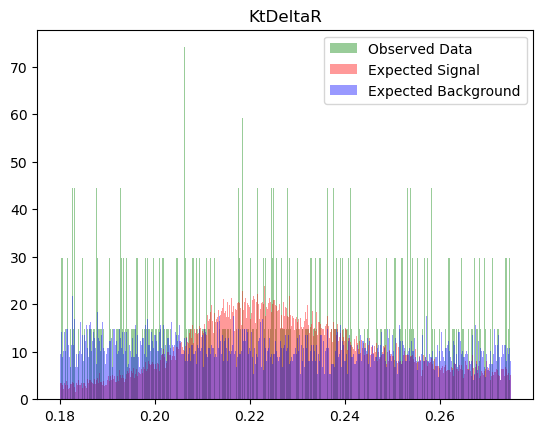

Observed Significance:  1.8715350069334888 sigma


In [65]:
bottom = 0.18
upper = 0.275

observed = list(filter(lambda a: a >= bottom and a <= upper, highLumi['KtDeltaR'][:]))
background = list(filter(lambda a: a >= bottom and a <= upper, qcd['KtDeltaR'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['KtDeltaR'][:]))

bins = 800
plt.hist(observed[:], bins, alpha=0.4, color='green', density = True, label="Observed Data")
plt.hist(signal[:], bins, alpha=0.4, color="red", density = True, label="Expected Signal")
plt.hist(background[:], bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")

plt.title('KtDeltaR') 
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['KtDeltaR'][:]))*50
nqcd_root = ((sum(observed[:])/sum(highLumi['KtDeltaR'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Observed Significance: ", ratio, "sigma")

Similarly to lab 7, the expected significance of Eta scored an absurd value of 37.2 sigma, therefore for further analysis this feature will be disregarded. Since the observed data followed the expected background closely, a lot of the observed signficance values calculated are similar to the expectation significance values calculated in the previous lab.

| | QCD Expected Background(sigma)     | High Luminosity Observed(sigma) |
| ----------- | ----------- | -----------|
| mass      | 3.686      | 2.7658 |
| eta   | 11.8528       | 37.256 |
| ee2 | 2.314 | 2.180 |
| ee3 |4.955 | 4.722 |
| d2 | 2.508 | 2.402 |
| angularity |2.146| 2.070 |
| t2 | 1.857 | 1.800 |
| t3 | 2.1084 | 2.000 |
| t21 | 1.8464 | 1.814 |
| KtDeltaR | 2.2456 | 1.8715|

All 10 selected features have optimally selected cuts to the expected background data. Disregarding the anomaly of eta, the remaining 9 features all have the expected signficance higher than the observed significance. This makes sense because the optimal event selection is based on the background data set QCD. Although the observed data generally follows the background data, since event selection is optimized on the expected background(not the observed data), the expected significance should generally be slightly higher than the observed significance. The 3-point ECF ratio(ee3) still proves to be the highest observed significance of 4.722 sigma across all 10 selected features.

# Problem 2

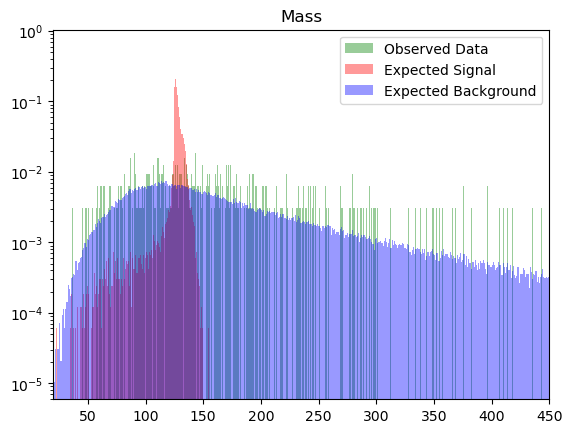

NHiggs:  50.0
(√NObserved):  44.721359549995796
Observed Significance:  1.118033988749895 sigma


In [67]:
bins = 800
plt.hist(lowLumi['mass'][:], bins, alpha=0.4, color='green', density = True, label="Observed Data")
plt.hist(higgs['mass'][:], bins, alpha=0.4, color="red", density = True, label="Expected Signal")
plt.hist(qcd['mass'][:] , bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")
plt.xlim(20,450)
plt.yscale('log')

plt.title('Mass') 
plt.show()

nhiggs = (sum(higgs['mass'][:]) / sum(higgs['mass'][:]))*50
nqcd_sqrt = ((sum(lowLumi['mass'][:])/sum(lowLumi['mass'][:]))*2000)**(0.5)
print("NHiggs: ", nhiggs)
print("(√NObserved): ", nqcd_sqrt)
ratio =  nhiggs/nqcd_sqrt
print("Observed Significance: ", ratio, "sigma")

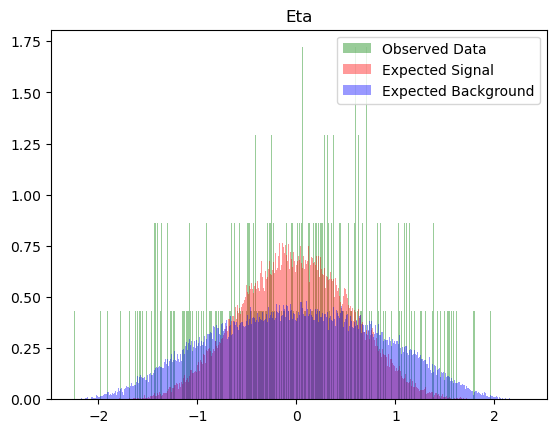

In [68]:
bins = 800
plt.hist(lowLumi['eta'][:], bins, alpha=0.4, color='green', density = True, label="Observed Data")
plt.hist(higgs['eta'][:], bins, alpha=0.4, color="red", density = True, label="Expected Signal")
plt.hist(qcd['eta'][:] , bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")

plt.title('Eta') 
plt.show()

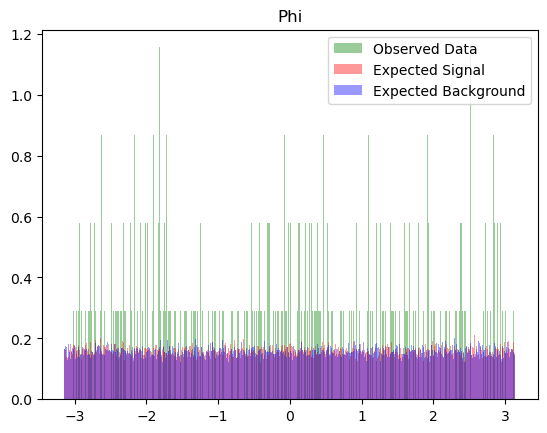

In [69]:
bins = 800
plt.hist(lowLumi['phi'][:], bins, alpha=0.4, color='green', density = True, label="Observed Data")
plt.hist(higgs['phi'][:], bins, alpha=0.4, color="red", density = True, label="Expected Signal")
plt.hist(qcd['phi'][:] , bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")

plt.title('Phi') 
plt.show()

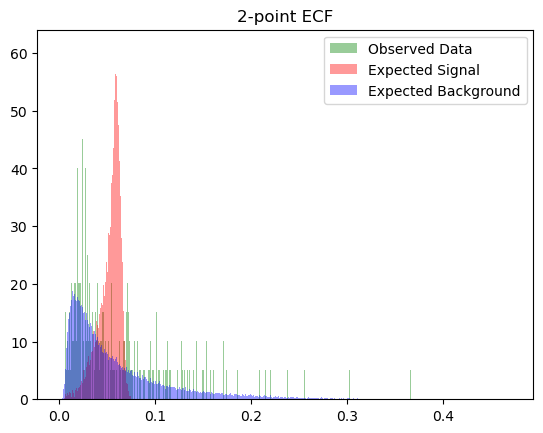

In [70]:
bins = 800
plt.hist(lowLumi["ee2"][:], bins, alpha=0.4, color='green', density = True, label="Observed Data")
plt.hist(higgs['ee2'][:], bins, alpha=0.4, color="red", density = True, label="Expected Signal")
plt.hist(qcd['ee2'][:] , bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")

plt.title('2-point ECF') 
plt.show()

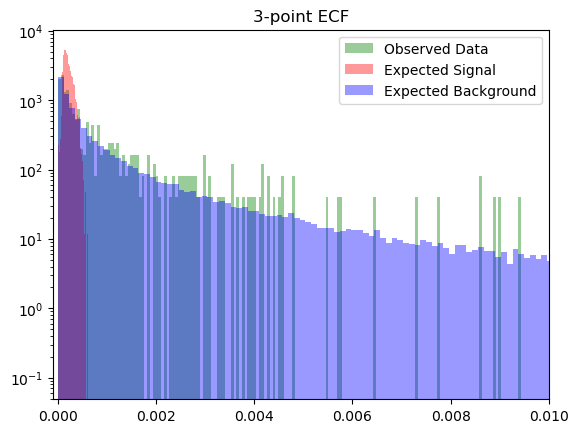

In [71]:
bins = 800
plt.hist(lowLumi['ee3'][:], bins, alpha=0.4, color='green', density = True, label="Observed Data")
plt.hist(higgs['ee3'][:], bins, alpha=0.4, color="red", density = True, label="Expected Signal")
plt.hist(qcd['ee3'][:] , bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")
plt.xlim(-0.0001, 0.01)
plt.yscale("log")

plt.title('3-point ECF') 
plt.show()

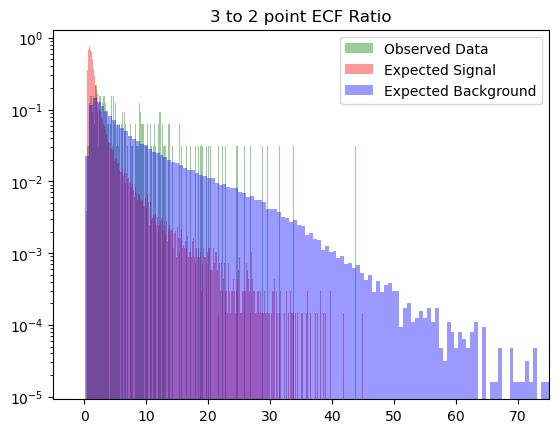

In [73]:
bins = 800
plt.hist(lowLumi['d2'][:], bins, alpha=0.4, color='green', density = True, label="Observed Data")
plt.hist(higgs['d2'][:], bins, alpha=0.4, color="red", density = True, label="Expected Signal")
plt.hist(qcd['d2'][:] , bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")
plt.xlim(-5,75)
plt.yscale('log')

plt.title('3 to 2 point ECF Ratio') 
plt.show()

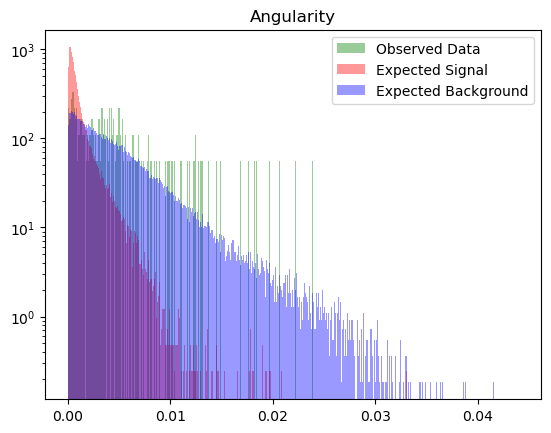

In [74]:
bins = 800
plt.hist(lowLumi['angularity'][:], bins, alpha=0.4, color='green', density = True, label="Observed Data")
plt.hist(higgs['angularity'][:], bins, alpha=0.4, color="red", density = True, label="Expected Signal")
plt.hist(qcd['angularity'][:] , bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")
plt.yscale('log')

plt.title('Angularity') 
plt.show()

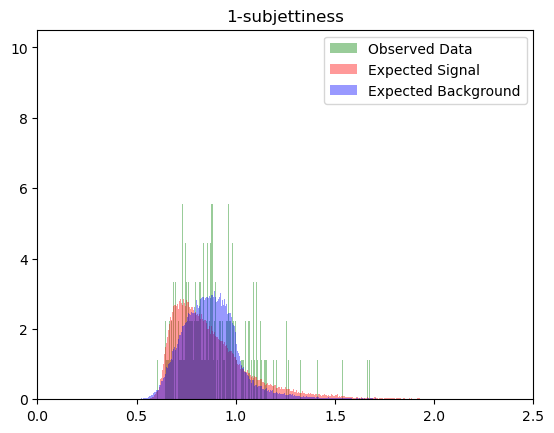

In [75]:
bins = 800
plt.hist(lowLumi['t1'][:], bins, alpha=0.4, color='green', density = True, label="Observed Data")
plt.hist(higgs['t1'][:], bins, alpha=0.4, color="red", density = True, label="Expected Signal")
plt.hist(qcd['t1'][:] , bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")
plt.xlim(0,2.5)
plt.tick_params()
plt.title('1-subjettiness') 
plt.show()

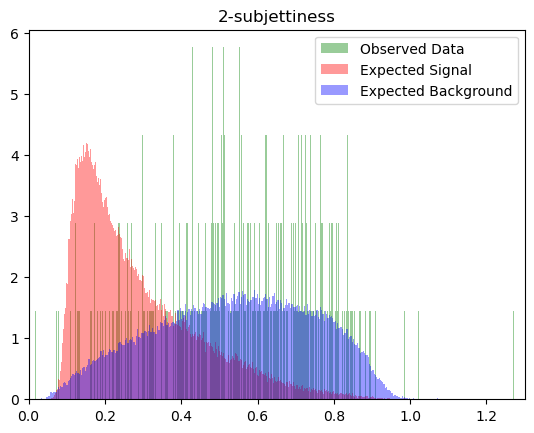

In [76]:
bins = 800
plt.hist(lowLumi['t2'][:], bins, alpha=0.4, color='green', density = True, label="Observed Data")
plt.hist(higgs['t2'][:], bins, alpha=0.4, color="red", density = True, label="Expected Signal")
plt.hist(qcd['t2'][:] , bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")
plt.xlim(0,1.3)

plt.title('2-subjettiness') 
plt.show()

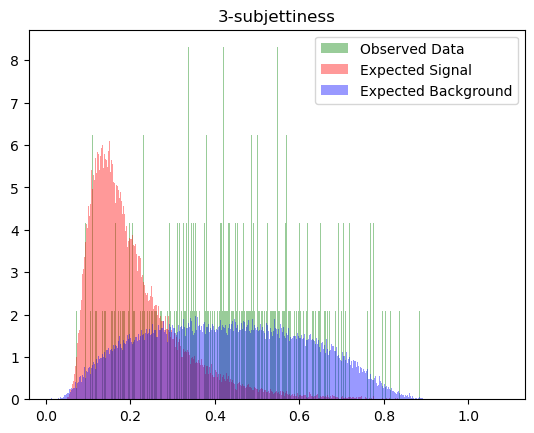

In [77]:
bins = 800
plt.hist(lowLumi['t3'][:], bins, alpha=0.4, color='green', density = True, label="Observed Data")
plt.hist(higgs['t3'][:], bins, alpha=0.4, color="red", density = True, label="Expected Signal")
plt.hist(qcd['t3'][:] , bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")

plt.title('3-subjettiness') 
plt.show()

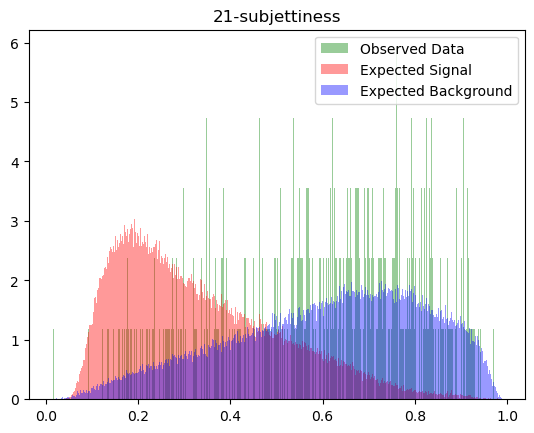

In [78]:
bins = 500
plt.hist(lowLumi['t21'][:], bins, alpha=0.4, color='green', density = True, label="Observed Data")
plt.hist(higgs['t21'][:], bins, alpha=0.4, color="red", density = True, label="Expected Signal")
plt.hist(qcd['t21'][:] , bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")

plt.title('21-subjettiness') 
plt.show()

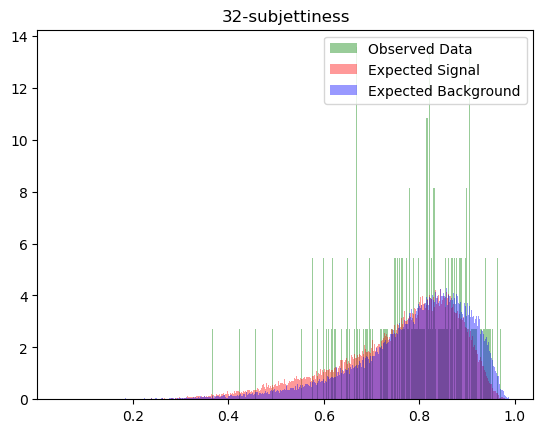

In [79]:
bins = 800
plt.hist(lowLumi['t32'][:], bins, alpha=0.4, color='green', density = True, label="Observed Data")
plt.hist(higgs['t32'][:], bins, alpha=0.4, color="red", density = True, label="Expected Signal")
plt.hist(qcd['t32'][:] , bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")

plt.title('32-subjettiness') 
plt.show()

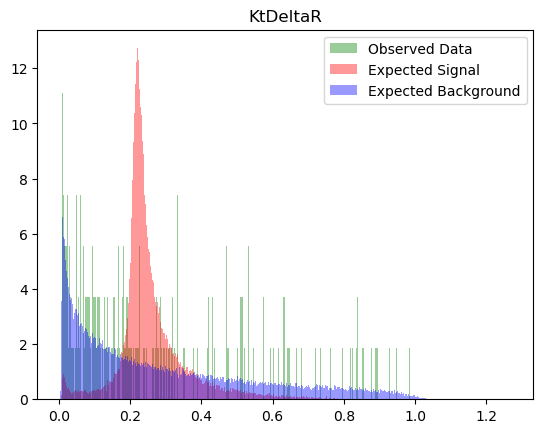

In [80]:
bins = 800
plt.hist(lowLumi['KtDeltaR'][:], bins, alpha=0.4, color='green', density = True, label="Observed Data")
plt.hist(higgs['KtDeltaR'][:], bins, alpha=0.4, color="red", density = True, label="Expected Signal")
plt.hist(qcd['KtDeltaR'][:] , bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")

plt.title('KtDeltaR') 
plt.show()

Similar to the high luminosity observed data, the low luminosity data is spiky and it seems like the values are discretized for all features. It generally follows the background, but the high luminosity observed data follows the background much better than the low luminosity observed data. The low luminosity is also much more spiky, and is spiky throughout the data set. While the high luminosity data has its data points condensed around the mean, and becomes more fragmented when it reaches the outliers, the low luminosity data set is fragmented throughout. The following of the expected background is poor, looking at 21-subjettiness as an example, low luminosity does a poor job avoiding the expected signal dataset, and there are often data points overlapping with the expected signal. The observed significance is still 1.118 sigma because not cuts have been made.

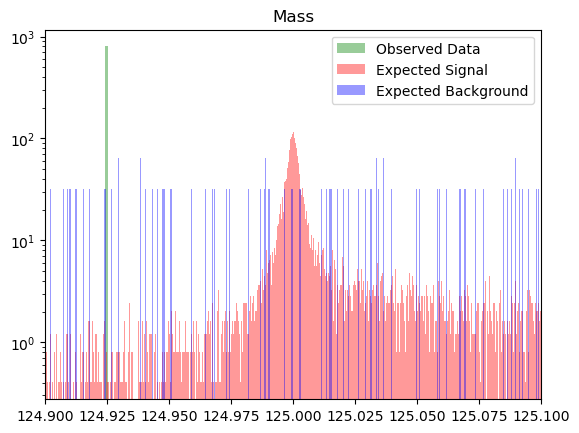

Observed Significance:  2.703737426779456 sigma


In [81]:
bottom = 124.9
upper = 125.1

observed = list(filter(lambda a: a >= bottom and a <= upper, lowLumi['mass'][:]))
background = list(filter(lambda a: a >= bottom and a <= upper, qcd['mass'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['mass'][:]))

bins = 800
plt.hist(observed[:], bins, alpha=0.4, color='green', density = True, label="Observed Data")
plt.hist(signal[:], bins, alpha=0.4, color="red", density = True, label="Expected Signal")
plt.hist(background[:], bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")
plt.yscale("log")
plt.xlim(124.9,125.1)

plt.title('Mass') 
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['mass'][:]))*50
nqcd_root = ((sum(observed[:])/sum(lowLumi['mass'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Observed Significance: ", ratio, "sigma")

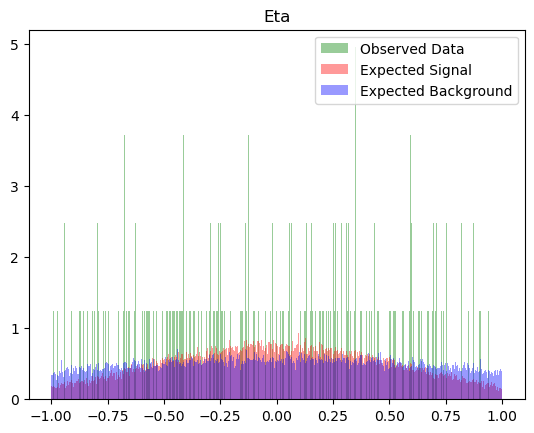

Observed Significance:  22.38984914216728 sigma


In [82]:
bottom = -1
upper = 1

observed = list(filter(lambda a: a >= bottom and a <= upper, lowLumi['eta'][:]))
background = list(filter(lambda a: a >= bottom and a <= upper, qcd['eta'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['eta'][:]))

bins = 800
plt.hist(observed[:], bins, alpha=0.4, color='green', density = True, label="Observed Data")
plt.hist(signal[:], bins, alpha=0.4, color="red", density = True, label="Expected Signal")
plt.hist(background[:], bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")

plt.title('Eta') 
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['eta'][:]))*50
nqcd_root = ((sum(observed[:])/sum(lowLumi['eta'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Observed Significance: ", ratio, "sigma")

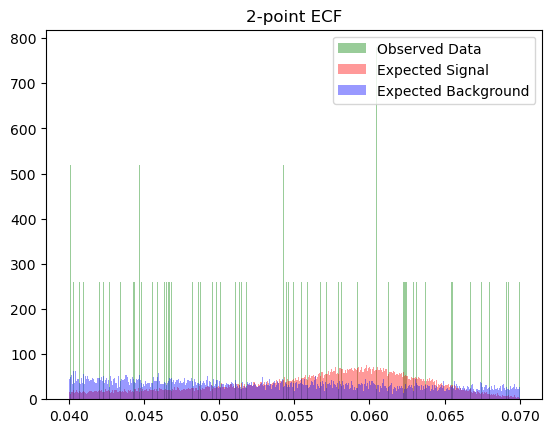

Observed Significance:  2.1835453304873003 sigma


In [83]:
bottom = 0.04
upper = 0.07

observed = list(filter(lambda a: a >= bottom and a <= upper, lowLumi['ee2'][:]))
background = list(filter(lambda a: a >= bottom and a <= upper, qcd['ee2'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['ee2'][:]))

bins = 800
plt.hist(observed[:], bins, alpha=0.4, color='green', density = True, label="Observed Data")
plt.hist(signal[:], bins, alpha=0.4, color="red", density = True, label="Expected Signal")
plt.hist(background[:], bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")

plt.title('2-point ECF') 
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['ee2'][:]))*50
nqcd_root = ((sum(observed[:])/sum(lowLumi['ee2'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Observed Significance: ", ratio, "sigma")

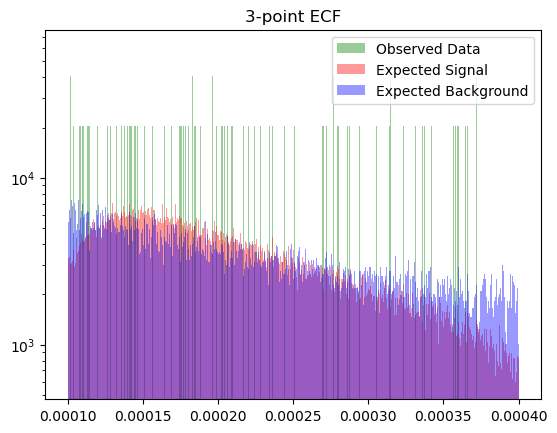

In [84]:
bottom = .0001
upper = .0004

observed = list(filter(lambda a: a >= bottom and a <= upper, lowLumi['ee3'][:]))
background = list(filter(lambda a: a >= bottom and a <= upper, qcd['ee3'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['ee3'][:]))

bins = 800
plt.hist(observed[:], bins, alpha=0.4, color='green', density = True, label="Observed Data")
plt.hist(signal[:], bins, alpha=0.4, color="red", density = True, label="Expected Signal")
plt.hist(background[:], bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")
plt.tick_params()
plt.yscale("log")
plt.title('3-point ECF') 
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['ee3'][:]))*50
nqcd_root = ((sum(observed[:])/sum(lowLumi['ee3'][:]))*2000)**(0.5)
ratioee3 = nhiggs / nqcd_root

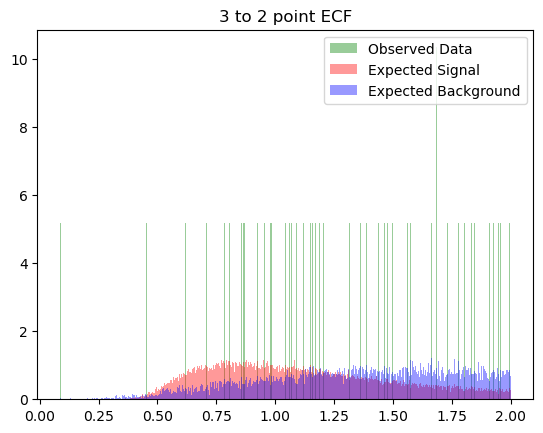

Observed Significance:  2.4378645306562197 sigma


In [85]:
bottom = 0
upper = 2

observed = list(filter(lambda a: a >= bottom and a <= upper, lowLumi['d2'][:]))
background = list(filter(lambda a: a >= bottom and a <= upper, qcd['d2'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['d2'][:]))

bins = 800
plt.hist(observed[:], bins, alpha=0.4, color='green', density = True, label="Observed Data")
plt.hist(signal[:], bins, alpha=0.4, color="red", density = True, label="Expected Signal")
plt.hist(background[:], bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")

plt.title('3 to 2 point ECF') 
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['d2'][:]))*50
nqcd_root = ((sum(observed[:])/sum(lowLumi['d2'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Observed Significance: ", ratio, "sigma")

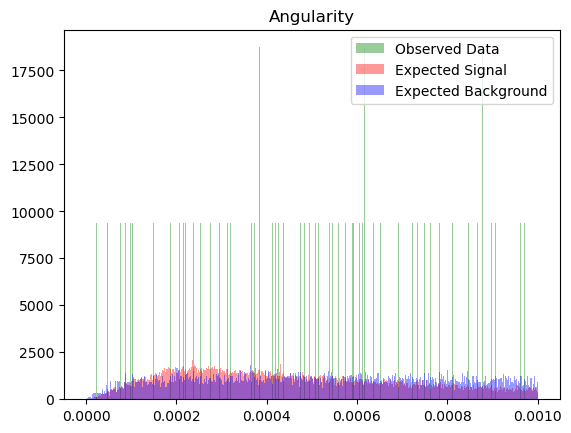

Observed Significance:  2.11490829431032 sigma


In [86]:
bottom = 0
upper = 0.001

observed = list(filter(lambda a: a >= bottom and a <= upper, lowLumi['angularity'][:]))
background = list(filter(lambda a: a >= bottom and a <= upper, qcd['angularity'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['angularity'][:]))

bins = 800
plt.hist(observed[:], bins, alpha=0.4, color='green', density = True, label="Observed Data")
plt.hist(signal[:], bins, alpha=0.4, color="red", density = True, label="Expected Signal")
plt.hist(background[:], bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")

plt.title('Angularity') 
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['angularity'][:]))*50
nqcd_root = ((sum(observed[:])/sum(lowLumi['angularity'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Observed Significance: ", ratio, "sigma")

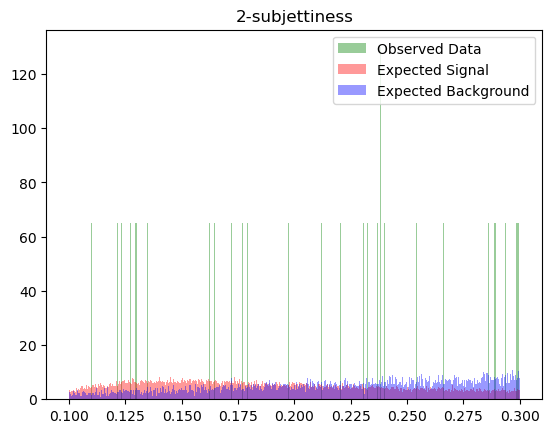

Observed Significance:  1.868966648222646 sigma


In [87]:
bottom = 0.1
upper = 0.3

observed = list(filter(lambda a: a >= bottom and a <= upper, lowLumi['t2'][:]))
background = list(filter(lambda a: a >= bottom and a <= upper, qcd['t2'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['t2'][:]))

bins = 800
plt.hist(observed[:], bins, alpha=0.4, color='green', density = True, label="Observed Data")
plt.hist(signal[:], bins, alpha=0.4, color="red", density = True, label="Expected Signal")
plt.hist(background[:], bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")

plt.title('2-subjettiness') 
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['t2'][:]))*50
nqcd_root = ((sum(observed[:])/sum(lowLumi['t2'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Observed Significance: ", ratio, "sigma")

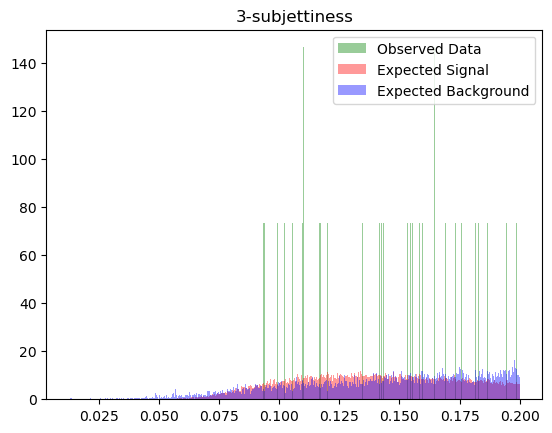

Observed Significance:  2.0851230631723907 sigma


In [88]:
bottom = 0
upper = 0.2

observed = list(filter(lambda a: a >= bottom and a <= upper, lowLumi['t3'][:]))
background = list(filter(lambda a: a >= bottom and a <= upper, qcd['t3'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['t3'][:]))

bins = 800
plt.hist(observed[:], bins, alpha=0.4, color='green', density = True, label="Observed Data")
plt.hist(signal[:], bins, alpha=0.4, color="red", density = True, label="Expected Signal")
plt.hist(background[:], bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")

plt.title('3-subjettiness') 
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['t3'][:]))*50
nqcd_root = ((sum(observed[:])/sum(lowLumi['t3'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Observed Significance: ", ratio, "sigma")

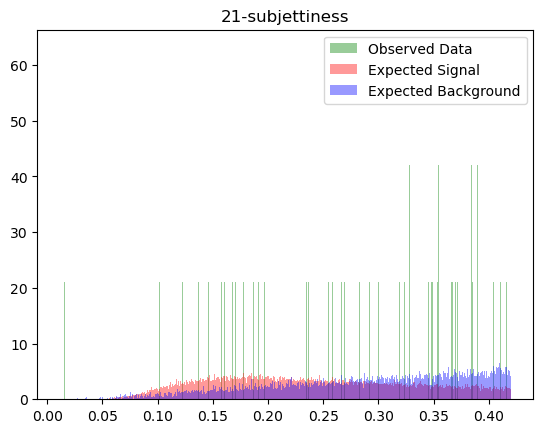

Observed Significance:  1.8315811585967354 sigma


In [89]:
bottom = 0
upper = 0.42

observed = list(filter(lambda a: a >= bottom and a <= upper, lowLumi['t21'][:]))
background = list(filter(lambda a: a >= bottom and a <= upper, qcd['t21'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['t21'][:]))

bins = 800
plt.hist(observed[:], bins, alpha=0.4, color='green', density = True, label="Observed Data")
plt.hist(signal[:], bins, alpha=0.4, color="red", density = True, label="Expected Signal")
plt.hist(background[:], bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")

plt.title('21-subjettiness') 
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['t21'][:]))*50
nqcd_root = ((sum(observed[:])/sum(lowLumi['t21'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Observed Significance: ", ratio, "sigma")

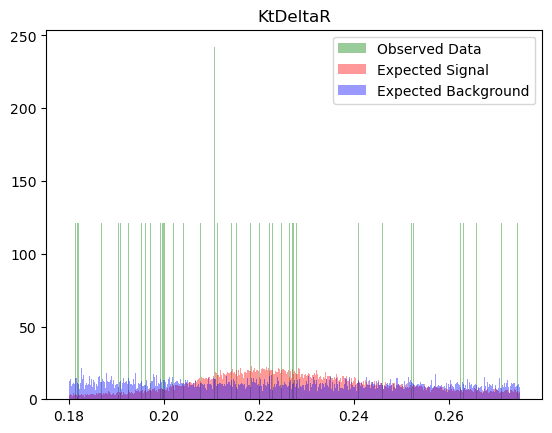

Observed Significance:  1.734114629672295 sigma


In [90]:
bottom = 0.18
upper = 0.275

observed = list(filter(lambda a: a >= bottom and a <= upper, lowLumi['KtDeltaR'][:]))
background = list(filter(lambda a: a >= bottom and a <= upper, qcd['KtDeltaR'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['KtDeltaR'][:]))

bins = 800
plt.hist(observed[:], bins, alpha=0.4, color='green', density = True, label="Observed Data")
plt.hist(signal[:], bins, alpha=0.4, color="red", density = True, label="Expected Signal")
plt.hist(background[:], bins, alpha=0.4, density = True, color="blue", label="Expected Background")
plt.legend(loc="upper right")

plt.title('KtDeltaR') 
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['KtDeltaR'][:]))*50
nqcd_root = ((sum(observed[:])/sum(lowLumi['KtDeltaR'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Observed Significance: ", ratio, "sigma")

Optimal cuts on the select 10 features have been made based on QCD expected background data, just like in the high luminosity example. By making these cuts, and getting a closer look at the plots, it highlights the spiky nature of the low luminosity dataset. This means across the select features, the data points are discretized to certain values.

Once again the eta value scores an absurd significance of 22.3898 sigma, and hence will be ignored in the comparison. It is interesting to me that across all 3 datasets, I got really high significance values for eta. Just like in the high luminosity example, the observed significance for low luminosity is less than all 9 remaining select features for the expected significance. This makes sense because the cuts were done based on the QCD background data set and not the low luminosity data. Comparing high lumi vs low lumi: out of the 9 remaining features 6 have a higher significance for the low luminosity data. The differences in observed significance vary from as little as ~0.02, to as large as ~0.3 sigma. There is no clear trend between the two datasets on the observed significance, and the differences can be written off as statistical variation. The 3-point ECF ratio(ee3) continues to be the highest observed significance value.

# Problem 3

In [91]:
confidence_signal = np.percentile(higgs[:], 95)
print('95% confidence upperbound of the expected signal is:', confidence_signal)
confidence_background = np.percentile(qcd[:], 95)
print('95% confidence upperbound of the expected background is:', confidence_background)
confidence_observed = np.percentile(lowLumi[:], 95)
print('95% confidence upperbound of the observed data is:', confidence_observed)

95% confidence upperbound of the expected signal is: 1080.4221976970337
95% confidence upperbound of the expected background is: 1063.4277046643817
95% confidence upperbound of the observed data is: 1070.367694904766


The 95% confidence upperbound for the observed low luminosity data is ~7 higher than the expected background. This tells me that generally the observed data at the 95th percentile is closer to the expected signal than the expected background. Also if I observe a candidate signal (5σ event), and it is too weak to claim a detection, then the true signal would be less than 1070.367 (95% confidence upper bound of observed data) 95% of the time.

# Problem 4

The 1 sigma uncertainty of the expected signal & background 95% confidence upper limit is +/- 32.578 andd 32.572 respectively. This shows us that the expected confidence is a good approximation off the observed confidence, because the observed confidence is in less than one sigma of the expected.

In [92]:
p = stats.norm.cdf(1) #probability of one sigma
val = stats.poisson.ppf(p, confidence_signal) #1 sigma uncertainty about the expected 95% confidence upper limit
uncertainty = abs(confidence_signal - val)
print("Expected signal: ", '%.3f'%(confidence_signal), " has a 1σ uncertainty of +/- ", '%.3f'%(uncertainty))
val = stats.poisson.ppf(p, confidence_background)
uncertainty = abs(confidence_background - val)
print("Expected background: ", '%.3f'%(confidence_background), " has a 1σ uncertainty of +/- ", '%.3f'%(uncertainty))

Expected signal:  1080.422  has a 1σ uncertainty of +/-  32.578
Expected background:  1063.428  has a 1σ uncertainty of +/-  32.572
